# <center>**Computer-Aided Diagnosis MIDTerm Proj**</center>

### **Machine Learning classifiers for Alzheimer Disease based on MR Imaging Radiomics of the left hippocampus**

Datasets: 3 [MS Excel files](https://elearning.ua.pt/mod/folder/view.php?id=1095532)

*   200 Control vs 200 Alzheimer cases (WorkHipoEsqDACN.xlsx)

*   200 Control vs 200 Mild Cognitive Impairment (MCI) cases (WorkHipoEsqCNMCI.xlsx)
*   200 Mild Cognitive Impairment (MCI) vs 200 Alzheimer cases (WorkDAMCI.xlsx)


**Data collection**

Each dataset is composed of radiomics features obtained by image analysis of left hippocampus ROIS after subcortical segmentation of neuro MR studies avalialable at the [ADNI](https://adni.loni.usc.edu/) repository.
Image segmentation was performed by the [VolBrain](https://www.volbrain.upv.es/) online brain volumetry platform.

Radiomics features were computed by the [LifeX](https://www.lifexsoft.org/) software tool.



**Authors:**

Artur Freitas, 97549

Rita Barnabé, 97502

# **Objectives**
Explore numerical features for each dataset.

Compare the binary classification performance of:

*   Support Vector Machines
*   Neural Networks
*   Random Forests

Build a data frame with 600 instances: 200 Control, 200 MCI and 200 Alzheimer Disease.
Try to find the best model for a 3 class classification task.

# Deliverables
Commented jupyter notebook(s)

*   Data preparation
*   Feature Selection
*   Training and validation approaches
*   Performance evaluation
*   Feature Ranking



# Starting the Resolution of Mid Term Project with:
#### Reading Python Modules 

In [98]:
import numpy as np
import pandas as pd
import copy
import itertools

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from IPython.display import Image

import seaborn as sb

from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier



#### DATA Reading and Processing 


In [99]:

# Data frame creation:
df1 = pd.read_excel("WorkHipoEsqDACN.xlsx",header = 0)
df2 = pd.read_excel("WorkHipoEsqCNMCI.xlsx",header = 0)
df3 = pd.read_excel("WorkHipoEsqDAMCI.xlsx",header = 0)

# Displaying each table using the command .head():
df1.head()

DA  Age  Sex  CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  \
0   1   73    1         143.976944         193.036763         18.728535   
1   1   74    1         146.203033         193.219434         18.894705   
2   1   74    1         119.456741         180.084749         25.137809   
3   1   74    1         140.723282         191.422071         19.740543   
4   1   67    1         154.285492         195.282236         18.942624   

   CONVENTIONAL_max  CONVENTIONAL_Skewness  CONVENTIONAL_Kurtosis  \
0        268.521362               0.387954               3.881567   
1        264.507874               0.372894               3.763369   
2        268.183777               0.169002               2.905132   
3        258.418243               0.262619               3.594804   
4        269.194366               0.591041               3.673427   

   CONVENTIONAL_ExcessKurtosis  ...  GLZLM_LZE  GLZLM_LGZE  GLZLM_HGZE  \
0                     0.881567  ...  31.988163    0.012026  827.838909   
1                     0.763369  ...  28.631005    0.010995  845.265478   
2                    -0.094868  ...   8.556565    0.011300  852.470695   
3                     0.594804  ...  13.049812    0.010913  959.246711   
4                     0.673427  ...  16.165012    0.020843  730.939007   

   GLZLM_SZLGE  GLZLM_SZHGE  GLZLM_LZLGE   GLZLM_LZHGE  GLZLM_GLNU  \
0     0.010039   631.203838     0.078225  17992.276891   46.442100   
1     0.009220   650.249131     0.069899  16421.418524   45.910352   
2     0.009069   635.645458     0.033995   6444.304407   51.439800   
3     0.010174   744.712279     0.031732   9491.949718   48.610902   
4     0.019296   578.072944     0.070151   7167.262411   48.956501   

    GLZLM_ZLNU  GLZLM_ZP  
0  1033.898610  0.486115  
1  1105.994552  0.501490  
2  1113.378010  0.558771  
3  1186.611842  0.551295  
4  1182.296454  0.531007  

[5 rows x 60 columns]

In [100]:
df2.head()

MCI  Age  Sex  CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  \
0    0   73    0         150.589111         200.257640         17.823930   
1    0   73    0         121.276802         188.295412         21.936076   
2    0   73    0         127.019737         191.395975         20.191905   
3    0   74    0         121.032593         188.563247         21.674552   
4    0   75    0         151.883469         196.069100         18.400921   

   CONVENTIONAL_max  CONVENTIONAL_Skewness  CONVENTIONAL_Kurtosis  \
0        260.388031               0.198209               3.856355   
1        274.208374               0.289006               4.218599   
2        257.600586               0.128895               4.070071   
3        258.819763               0.058848               3.991419   
4        268.626831               0.447075               3.982752   

   CONVENTIONAL_ExcessKurtosis  ...  GLZLM_LZE  GLZLM_LGZE   GLZLM_HGZE  \
0                     0.856355  ...  22.420907    0.013565  1015.904536   
1                     1.218599  ...  42.487271    0.008653   963.915587   
2                     1.070071  ...  22.271990    0.007385  1160.974381   
3                     0.991419  ...  30.050251    0.007151  1170.959799   
4                     0.982752  ...  23.430267    0.020353   773.059771   

   GLZLM_SZLGE  GLZLM_SZHGE  GLZLM_LZLGE   GLZLM_LZHGE  GLZLM_GLNU  \
0     0.012327   765.396907     0.047900  17926.259172   58.373570   
1     0.008190   728.638778     0.070080  31044.522108   55.994194   
2     0.007034   860.261441     0.030957  22047.863365   56.117848   
3     0.006005   879.165401     0.043133  28622.212312   56.252931   
4     0.018796   591.973179     0.070246  13311.672319   55.813904   

    GLZLM_ZLNU  GLZLM_ZP  
0  1374.281262  0.500099  
1  1194.675748  0.455174  
2  1213.839453  0.480410  
3  1250.374372  0.491763  
4  1260.582874  0.502771  

[5 rows x 61 columns]

In [101]:
df3.head()

DAVSMCI  Age  Sex  CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  \
0        1   73    1         143.976944         193.036763         18.728535   
1        1   74    1         146.203033         193.219434         18.894705   
2        1   74    1         119.456741         180.084749         25.137809   
3        1   74    1         140.723282         191.422071         19.740543   
4        1   67    1         154.285492         195.282236         18.942624   

   CONVENTIONAL_max  CONVENTIONAL_Skewness  CONVENTIONAL_Kurtosis  \
0        268.521362               0.387954               3.881567   
1        264.507874               0.372894               3.763369   
2        268.183777               0.169002               2.905132   
3        258.418243               0.262619               3.594804   
4        269.194366               0.591041               3.673427   

   CONVENTIONAL_ExcessKurtosis  ...  GLZLM_LZE  GLZLM_LGZE  GLZLM_HGZE  \
0                     0.881567  ...  31.988163    0.012026  827.838909   
1                     0.763369  ...  28.631005    0.010995  845.265478   
2                    -0.094868  ...   8.556565    0.011300  852.470695   
3                     0.594804  ...  13.049812    0.010913  959.246711   
4                     0.673427  ...  16.165012    0.020843  730.939007   

   GLZLM_SZLGE  GLZLM_SZHGE  GLZLM_LZLGE   GLZLM_LZHGE  GLZLM_GLNU  \
0     0.010039   631.203838     0.078225  17992.276891   46.442100   
1     0.009220   650.249131     0.069899  16421.418524   45.910352   
2     0.009069   635.645458     0.033995   6444.304407   51.439800   
3     0.010174   744.712279     0.031732   9491.949718   48.610902   
4     0.019296   578.072944     0.070151   7167.262411   48.956501   

    GLZLM_ZLNU  GLZLM_ZP  
0  1033.898610  0.486115  
1  1105.994552  0.501490  
2  1113.378010  0.558771  
3  1186.611842  0.551295  
4  1182.296454  0.531007  

[5 rows x 61 columns]


The first 3 features are removed from our DataFrame because they are features that identify patients, and therefore are not relevant for the classification.
Removal of meaningless features to be leftovers, since they always have the same value.

In [102]:
#df1 = df1.iloc[:, 3:]
#df2 = df2.iloc[:, 3:]
#df3 = df3.iloc[:, 3:]


Now we are going to analyze each file individually

# File 1 (WorkHipoEsqDACN.xlsx): 200 Control vs 200 Alzheimer cases 
As we can see from WorkHipoEsqDACN excel , the DISCRETIZED_min and DISCRETIZED_max columns have the same value for all observations so its necessary to remove them with:




In [103]:

df1.drop(['DISCRETIZED_min ', 'DISCRETIZED_max'],axis=1,inplace=True)

X1 = df1.iloc[:,3:]
y1 = df1.iloc[:,0] #Label


It is important to check if there are NaN values:

In [104]:
print(df1.isnull().values.any())

# Check if there are any null values.
# False = Does not exist NaN Values, True = Does exist

print(df1.describe())

False
               DA         Age      Sex  CONVENTIONAL_min   CONVENTIONAL_mean  \
count  400.000000  400.000000  400.000         400.000000         400.000000   
mean     0.500000   71.782500    0.525         126.340329         184.368694   
std      0.500626    5.088706    0.500          14.752525           7.814241   
min      0.000000   56.000000    0.000          63.074924         165.075327   
25%      0.000000   68.000000    0.000         115.810167         178.693687   
50%      0.500000   73.000000    1.000         125.160686         185.138090   
75%      1.000000   76.000000    1.000         136.042503         190.545289   
max      1.000000   80.000000    1.000         162.329163         200.257640   

       CONVENTIONAL_std  CONVENTIONAL_max  CONVENTIONAL_Skewness  \
count        400.000000        400.000000             400.000000   
mean          21.498984        268.116144               0.471122   
std            2.299269          8.921973               0.357683   
m

## Data Cleaning and Feature Selection

### By HeatMaps and Correlation Matrix

Removal of features using the correlation matrix. If two features are correlated with each other (value close to 1) then there is redundancy so we can remove one of them.






The correlation matrix is ​​calculated through .corr() and shows the Pearson correlation values, which indicates the linear relationship between two variables, which in this case is the linear relationship between two features of our DataFrame. These values ​​can vary from -1 to 1, and if the value is 1 these features increase and decrease together and equally with each other.

In [105]:
feat = df1

feat_corr_ = copy.deepcopy(feat)


feat_corr = feat_corr_.corr()


np.ones_like(feat_corr, dtype=np.bool)

# mask
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(25, 20))


# adjust mask and df
mask2 = mask2[1:, :-1]
corr2 = feat_corr.iloc[1:,:-1].copy()



# plot heatmap
sb.heatmap(corr2, mask=mask2, annot=True, square=True)

C:\Users\artur\AppData\Local\Temp\ipykernel_26332\3901572738.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(feat_corr, dtype=np.bool)
C:\Users\artur\AppData\Local\Temp\ipykernel_26332\3901572738.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))


<AxesSubplot:>

Through the heat map, we verify that there are many redundant values, and therefore, one of the 2 features them can be removed.
For correlation matrix, we defined a threshold of 0.9

## Heap Map with Redundant Features 

In [106]:
fig, ax = plt.subplots(figsize=(25, 20))

# plot heatmap
sb.heatmap(corr2[(corr2 < -0.9) | (corr2 > 0.9)], mask=mask2, annot=True, square=True)

<AxesSubplot:>


We also created a function that would allow us to create a new data frame, without one of the features that has a redundant value. Per example, the features GLZLM_SZE and GLRLM_SRE_ have a correlation of 0.94 and thus greater than 0.9, the function will then exclude one of them from the data frame

In [107]:

def CorrelationM (Data,threshold):
    col_corr=set()
    matriz_corr=Data.corr()
    for i in range(len(matriz_corr.columns)):
        for j in range(i):
            if abs(matriz_corr.iloc[i,j])>=threshold:
                colname=matriz_corr.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = CorrelationM(X1, 0.9)

X1_uncorr = X1.drop(labels=corr_features,axis=1)
print(X1_uncorr)



     CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  CONVENTIONAL_max  \
0           143.976944         193.036763         18.728535        268.521362   
1           146.203033         193.219434         18.894705        264.507874   
2           119.456741         180.084749         25.137809        268.183777   
3           140.723282         191.422071         19.740543        258.418243   
4           154.285492         195.282236         18.942624        269.194366   
..                 ...                ...               ...               ...   
395         108.625511         174.769245         24.506665        272.439636   
396         113.150711         173.176363         23.910760        288.517029   
397         106.420631         170.458540         24.862542        276.337463   
398         112.068413         175.341361         22.655073        282.883026   
399         113.021751         176.801602         23.754028        280.110016   

     CONVENTIONAL_Skewness 

Feature selection is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.

For this step, we used Pearson Correlation and removed correlated features in the 3 files and created a new data frame 

In [108]:
# X1 - corresponds to the clean data with all the features
# X1_uncorr - corresponds to the new matrix without the correlated features - created to improve results


## Train_Test_Split Function
Now, we are going to use Sklearn train_test_split function that helps us to create our training data and teste. 

The fuctiong of sklearn.model_selection package in python splits arrays or matrices into random subsets for train and test, respectively.

In [109]:

X_train, X_test, y_train, y_test = train_test_split( X1_uncorr, y1, test_size=0.2, random_state=0,shuffle=True)

print(X_train.shape)


(320, 18)


## Binary Classification - 3 Methods

### Support Vector Machines
Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection.
SVM is a distance based classifer so data normalization should follow.



In [110]:
# Normalize the data using StandardScaler
scaler = StandardScaler()

# Its important to normalize both train and test data set
X_tr=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


Let's check out the parameters that can maximize this method:

In [111]:

parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.2],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy']


GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

So, we are going to apply the training set in this function, in this loop:

In [112]:
for value in scores:
    
    print("# Tuning hyper-parameters for %s" %value)
    print()
    
    classification = GridSearchCV(SVC(), parameters, scoring='%s' %value, cv=5)
    classification.fit(X_tr, y_train)

    print("Best parameters set found on development set:")
    print()
    print(classification.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    means = classification.cv_results_['mean_test_score']
    stds = classification.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, classification.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

Grid scores on development set:

0.919 (+/-0.057) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.922 (+/-0.048) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.919 (+/-0.072) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.906 (+/-0.062) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.897 (+/-0.073) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.906 (+/-0.062) for {'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
0.897 (+/-0.073) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.906 (+/-0.062) for {'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}
0.897 (+/-0.051) for {'C': 1, 'kernel': 'linear'}
0.897 (+/-0.042) for {'C': 10, 'kernel': 'linear'}
0.916 (+/-0.064) for {'C': 100, 'kernel': 'linear'}
0.919 (+/-0.075) for {'C': 1000, 'kernel': 'linear'}


Aplication of SVM Model, now that we now the indicated parameters.
Use of Stratified K fold cross-validation object - returns stratified folds that are made by preserving the percentage of samples for each class.

In [113]:
SVM_ef=SVC(C=1,kernel='rbf', max_iter=5000, tol=1e-03, verbose=0,gamma=0.2)
   
scores=[];    

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_train, y_train)

for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain = scaler.fit_transform(X_train.iloc[train])
    Xtest = scaler.transform(X_train.iloc[test])    

    # Train and apply the algorithm to one 
    # of the datasets (test/training) used

    SVM_ef.fit(Xtrain, y_train.iloc[train])
    score = SVM_ef.score(Xtest, y_train.iloc[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [149 139], Acc: 0.906
Fold: 2, Class dist.: [149 139], Acc: 0.969
Fold: 3, Class dist.: [149 139], Acc: 0.875
Fold: 4, Class dist.: [149 139], Acc: 0.875
Fold: 5, Class dist.: [149 139], Acc: 0.938
Fold: 6, Class dist.: [149 139], Acc: 0.938
Fold: 7, Class dist.: [150 138], Acc: 0.938
Fold: 8, Class dist.: [150 138], Acc: 0.906
Fold: 9, Class dist.: [150 138], Acc: 0.844
Fold: 10, Class dist.: [150 138], Acc: 0.938

CV accuracy: 0.912 +/- 0.036


Without StratifiedKFold, we are going to apply in all the training data set, at the same time

In [114]:
# Normalization
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

# Applying to training data
SVM_ef.fit(Xtr, y_train)
y_pred = SVM_ef.predict(Xtest)

print(classification_report(y_test,y_pred))

# we realize that the accuracy value associated with this analysis varies,
# so you should opt for cross validation

# Alternatively, the confusion matrix can be analyzed:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.98      0.89      0.93        46

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



The confusion matrix:

In [115]:

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

### Random Forests

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training phase and outputting the class that is the mode of the classes or the mean prediction of the individual trees.
The main idea behind the Random Forest is to build multiple decision trees on random subsets of the data and then combine their predictions to obtain a final prediction that is more accurate than the individual predictions of each tree.


We start by doing a standarization of the feature data for the training and testing set.
A set of hyperparameters are then defined as well as the score that will evaluate them and determinate, by a grid search, which is the best ensamble of hyperparameters to train this model. 

In [116]:
# Standarization 
X_tr = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

# Hyperparameters and score
param_grid = {
    'n_estimators': [20, 40, 60, 80],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 3]
}
scores = ['accuracy']

# Grid search
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_tr, y_train)



c:\Users\artur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [20, 40, 60, 80]},
             scoring='accuracy')

Here we can access which set of hyperparameters graded with the best score, and analyse all the grid scores.

In [117]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print()
print("Best hyperparameters: ")
print(best_params)
print()
print("Best score: ")
print(best_score)

# Obtainment of the mean and standard deviation of all scores calculated in the grid search
mean_score = grid_search.cv_results_['mean_test_score']
std_score = grid_search.cv_results_['std_test_score']

# Print of all grid scores with their error associated
print()
print("Grid scores on development set:")
for mean, std, params in zip(mean_score, std_score, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
    



Best hyperparameters: 
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}

Best score: 
0.93125

Grid scores on development set:
0.922 (+/-0.071) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.916 (+/-0.073) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.912 (+/-0.064) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
0.922 (+/-0.044) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
0.912 (+/-0.070) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}
0.912 (+/-0.047) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 40}
0.916 (+/-0.064) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 60}
0.916 (+/-0.064) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 8

Aplication of Random Forest Model, now that we now the indicated parameters.
Use of Stratified K fold cross-validation object - returns stratified folds that are made by preserving the percentage of samples for each class.

In [118]:
# Random Forest model with the best hyperparameters
random_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'], oob_score=True, n_jobs=-1) 

# Stratified K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_tr, y_train)
scores=[]; 
X_tr_df = pd.DataFrame(X_tr)

for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain=scaler.fit_transform(X_tr_df.iloc[train])
    Xtest=scaler.transform(X_tr_df.iloc[test])    

    # Train and apply the algorithm to one
    # of the datasets (test/training) used
    random_forest.fit(Xtrain, y_train.iloc[train])
    score = random_forest.score(Xtest, y_train.iloc[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))



Fold: 1, Class dist.: [149 139], Acc: 0.906
Fold: 2, Class dist.: [149 139], Acc: 0.969
Fold: 3, Class dist.: [149 139], Acc: 0.812
Fold: 4, Class dist.: [149 139], Acc: 0.906
Fold: 5, Class dist.: [149 139], Acc: 0.938
Fold: 6, Class dist.: [149 139], Acc: 1.000
Fold: 7, Class dist.: [150 138], Acc: 0.906
Fold: 8, Class dist.: [150 138], Acc: 0.969
Fold: 9, Class dist.: [150 138], Acc: 0.844
Fold: 10, Class dist.: [150 138], Acc: 0.969

CV accuracy: 0.922 +/- 0.056


After StratifiedKFold, we are going to apply in all the training data set, at the same time.
To finish, it's displayed the classification report of the predictor model and the related confusion matrix.  

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        34
           1       0.97      0.78      0.87        46

    accuracy                           0.86        80
   macro avg       0.87      0.88      0.86        80
weighted avg       0.89      0.86      0.86        80



Text(0.5, 1.0, 'Confusion Matrix')

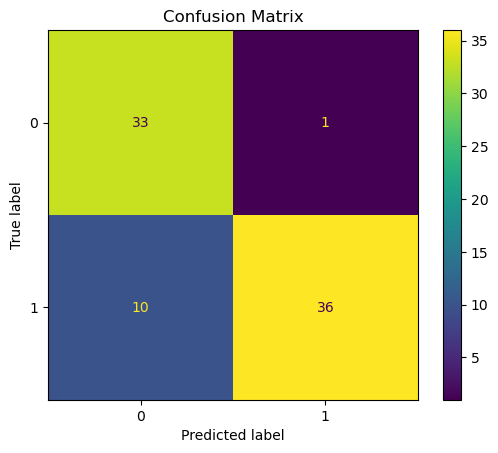

In [119]:
# Random Forest model applicated to the test set
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

random_forest.fit(Xtr, y_train)
y_pred = random_forest.predict(Xtest)

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

print("Classification Report:")
print(classification_report(y_test,y_pred))
disp.plot() 
disp.ax_.set_title("Confusion Matrix")


### Neural Networks

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [120]:
# As we did for the remaining methods, let's start by normalizing the data

scaler = StandardScaler()
X_tr_NN = scaler.fit_transform(X_train)
X_test_NN = scaler.transform(X_test)   


c:\Users\artur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MLP is then a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [121]:
# And then, apply the MLP Classifier
NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,32), random_state=1)

# datasets (test/training) used
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_train, y_train)
scores = []
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
all_conf_matrix = []



Obtaining the results for MLP classifier:

In [122]:
for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain = scaler.fit_transform(X_train.iloc[train])
    Xtest = scaler.transform(X_train.iloc[test])    

    # Train and apply the algorithm to one 
    # of the datasets (test/training) used

    NN.fit(Xtrain, y_train.iloc[train])
    y_pred = NN.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred) 
    all_conf_matrix.append(conf_mat)
    score = NN.score(Xtest, y_train.iloc[test])
    scores.append(score)
    
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train].values.ravel()), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 1, Class dist.: [149 139], Acc: 0.875


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 2, Class dist.: [149 139], Acc: 0.938


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 3, Class dist.: [149 139], Acc: 0.781


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 4, Class dist.: [149 139], Acc: 0.906


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 5, Class dist.: [149 139], Acc: 0.906


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 6, Class dist.: [149 139], Acc: 0.938


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 7, Class dist.: [150 138], Acc: 0.938


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 8, Class dist.: [150 138], Acc: 0.938


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 9, Class dist.: [150 138], Acc: 0.875
Fold: 10, Class dist.: [150 138], Acc: 0.938

CV accuracy: 0.903 +/- 0.047


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We end by applying the model to the test data and displaying the classification report and confusion matrix.

c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.97      0.85      0.91        46

    accuracy                           0.90        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80



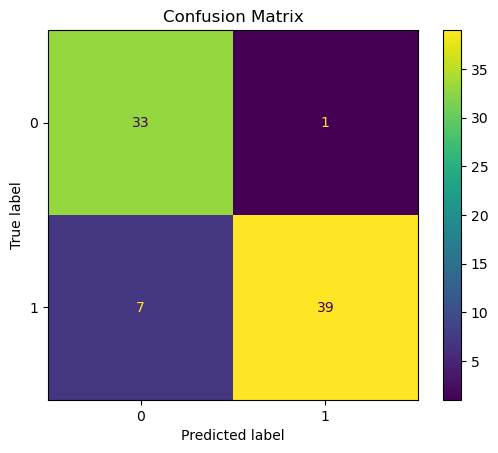

In [123]:
# Normalization
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

# Applying to training data
NN.fit(Xtr, y_train)
y_pred = NN.predict(Xtest)

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot() 
disp.ax_.set_title("Confusion Matrix")

print(classification_report(y_test,y_pred))

## Perfomance Comparasion of Binary Classifiers 
Starting with accuracy

In [124]:
scoring = 'accuracy'

Classifiers = []

Classifiers.append(('SVM', SVC(C=1,kernel='rbf', max_iter=5000, tol=1e-03, verbose=0,gamma=0.2)))
Classifiers.append(('rf', RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1 )))
Classifiers.append(('NN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,32), random_state=1)))


results = []
names = []

X1_uncorr_norm=scaler.fit_transform(X1_uncorr)

for name, model in Classifiers:

    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    print(model)
    cv_results = cross_val_score(model, X1_uncorr_norm, y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC(C=1, gamma=0.2, max_iter=5000, verbose=0)
SVM: 0.937500 (0.037500)
RandomForestClassifier(n_jobs=-1, oob_score=True)
rf: 0.925000 (0.040311)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64, 32), random_state=1)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multi

NN: 0.925000 (0.046098)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Now we are going to compare each models accuracy through boxplots:

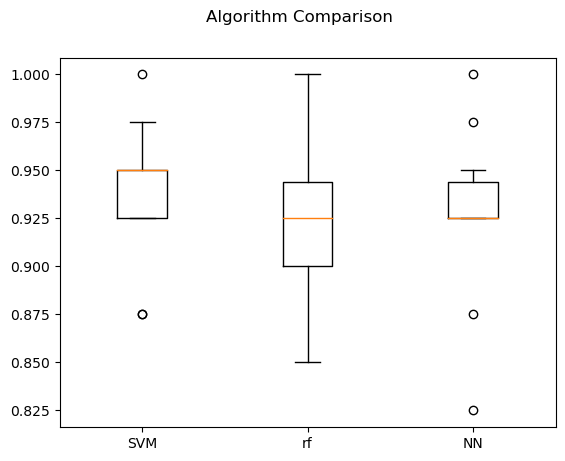

[array([0.875, 0.925, 0.95 , 0.95 , 0.975, 0.925, 0.95 , 0.95 , 0.875,
       1.   ]), array([0.9  , 0.85 , 0.925, 0.95 , 0.9  , 0.925, 1.   , 0.925, 0.9  ,
       0.975]), array([0.825, 0.925, 0.95 , 0.925, 0.925, 0.925, 1.   , 0.975, 0.875,
       0.925])]


In [125]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
print(results)

The median is the average value from a set of data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value, and half are less. For SVM we have an higher accuracy, with more precision and positive skew, that tell's us that this method its efficient (assymetric in a positive way - more high values than lower values).
Similar to SVM, NN method presents a smaller range of values ​​being more specific than RF, however the outliers are distant The values of accuracy are lower for NN.

The RF technique has lower accuracy values ​​and is also less precise (greater range) and higher variability.

For this file, the chosen technique is SVM, for being more precise and has more higher accuracy values

## Feature Ranking

Feature ranking allows us to identify which features are most important in predicting the target variable, and which ones can be ignored or removed from the model without significantly affecting its performance. This is useful in improving the model interpretability, and potentially reducing overfitting. It can also provide insights into the underlying relationships between features and the target variable, which can be useful for further analysis or domain knowledge.

We implemented this to our Neural Network model, to understand how can we approach future assignments.

Based on:
https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

The starting point was to see if our model suffers from overfitting comparing the score of the training and testing data.

In [126]:
NN.fit(X_tr, y_train)

print()
print(f'Model score on training data: {NN.score(X_tr, y_train)}')
print(f'Model score on test data: {NN.score(Xtest, y_test)}')
print()


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model score on training data: 0.984375
Model score on test data: 0.9



c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The following functions have the ultimate goal of ranknig all the features.

The first function, aims to score the model's accuracy after permuting a column of a feature. 
The second function, computes the score difference between the model's performance on the original and the permuted data for a given feature. 
The third function, calculates the mean and standard deviation for all features after repeated permutations. 
The forth and last function, plots the rank of importance of each feature based on its score difference

In [127]:
# 1st function
def score_aft_permutation(model, x, y, current_feature):
    x_permuted = x.copy()
    col_i = list(x.columns).index(current_feature)

    # Permute a column
    x_permuted.iloc[:, col_i] = np.random.permutation(x_permuted[current_feature].values)
    permuted_score = model.score(x_permuted, y)
    
    return permuted_score

# 2nd function
def feature_score(model, x, y, current_feature):
    base_score = model.score(x, y)
    permuted_score = score_aft_permutation(model, x, y, current_feature)
    feature_score = base_score - permuted_score

    return feature_score

# 3rd function
def permutation_score(model, x, y, n_rep):
    score = []

    for current_feature in x.columns:
        list_feature_score = []

        for n_loop in range(n_rep):
            list_feature_score.append(feature_score(model, x, y, current_feature))

        score.append(list_feature_score)
    
    return{'Score mean': np.mean(score, axis=1),
           'Score standard deviation': np.std(score, axis=1),
           'Score': score}

# 4th function
def plot_feature_ranking(permuted_score, feature):
    fig, ax = plt.subplots()
    ind = permuted_score['Score mean'].argsort()

    plt.barh(range(len(ind)), permuted_score['Score mean'][ind], xerr=permuted_score['Score standard deviation'][ind])

    ax.set_yticks(range(len(ind)))
    _ = ax.set_yticklabels(feature[ind])



To finish, here it is the ranking of all each feature importance.

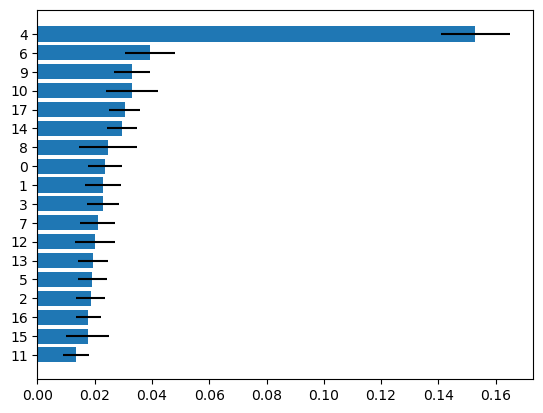

In [128]:
# Conversion of variables from numpy to Pandas
X_tr_df = pd.DataFrame(X_tr)
y_train_df = pd.DataFrame(y_train)

# Each feature is represented by its column number
permuted_score = permutation_score(NN, X_tr_df, y_train_df, n_rep=15)
plot_feature_ranking(permuted_score, X_tr_df.columns)

# The 4th feature ranks 1st 

# File 2 (WorkHipoEsqCNMCI.xlsx): 200 Control vs 200 Mild Cognitive Impairment (MCI) cases 
For this file, we are going to follow the same steps, starting by removing the features that have no relevance to be in the algorithm and next, checking for NaN values. The features related to patient identification (not relevant for the algorithm) were previously removed.




In [129]:

df2.drop(['DISCRETIZED_min ', 'DISCRETIZED_max'],axis=1,inplace=True)

X2 = df2.iloc[:,3:]
y2 = df2.iloc[:,0] #Label


It is important to check if there are NaN values:

In [130]:
print(df2.isnull().values.any())

# Check if there are any null values.
# False = Does not exist NaN Values, True = Does exist

print(df2.describe())

False
              MCI       Age         Sex  CONVENTIONAL_min   CONVENTIONAL_mean  \
count  400.000000  400.0000  400.000000         400.000000         400.000000   
mean     1.000000   72.3475    0.522500         124.452060         183.759488   
std      1.001252    4.6347    0.500119          13.939641           8.069829   
min      0.000000   57.0000    0.000000          70.939171         163.307302   
25%      0.000000   69.0000    0.000000         113.582720         177.186738   
50%      1.000000   73.0000    1.000000         121.870632         184.332762   
75%      2.000000   76.0000    1.000000         133.574417         189.900603   
max      2.000000   89.0000    1.000000         166.692322         205.181954   

       CONVENTIONAL_std  CONVENTIONAL_max  CONVENTIONAL_Skewness  \
count        400.000000        400.000000             400.000000   
mean          21.812515        268.619491               0.499257   
std            2.218776          8.319698               0.37

## Data Cleaning and Feature Selection

### By HeatMaps and Correlation Matrix

Removal of features using the correlation matrix. If two features are correlated with each other (value close to 1) then there is redundancy so we can remove one of them.






The correlation matrix is ​​calculated through .corr() and shows the Pearson correlation values, which indicates the linear relationship between two variables, which in this case is the linear relationship between two features of our DataFrame. These values ​​can vary from -1 to 1, and if the value is 1 these features increase and decrease together and equally with each other.

C:\Users\artur\AppData\Local\Temp\ipykernel_26332\230771975.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(feat_corr, dtype=np.bool)
C:\Users\artur\AppData\Local\Temp\ipykernel_26332\230771975.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))
C:\Users\artur\AppData\Local\Te

<AxesSubplot:>

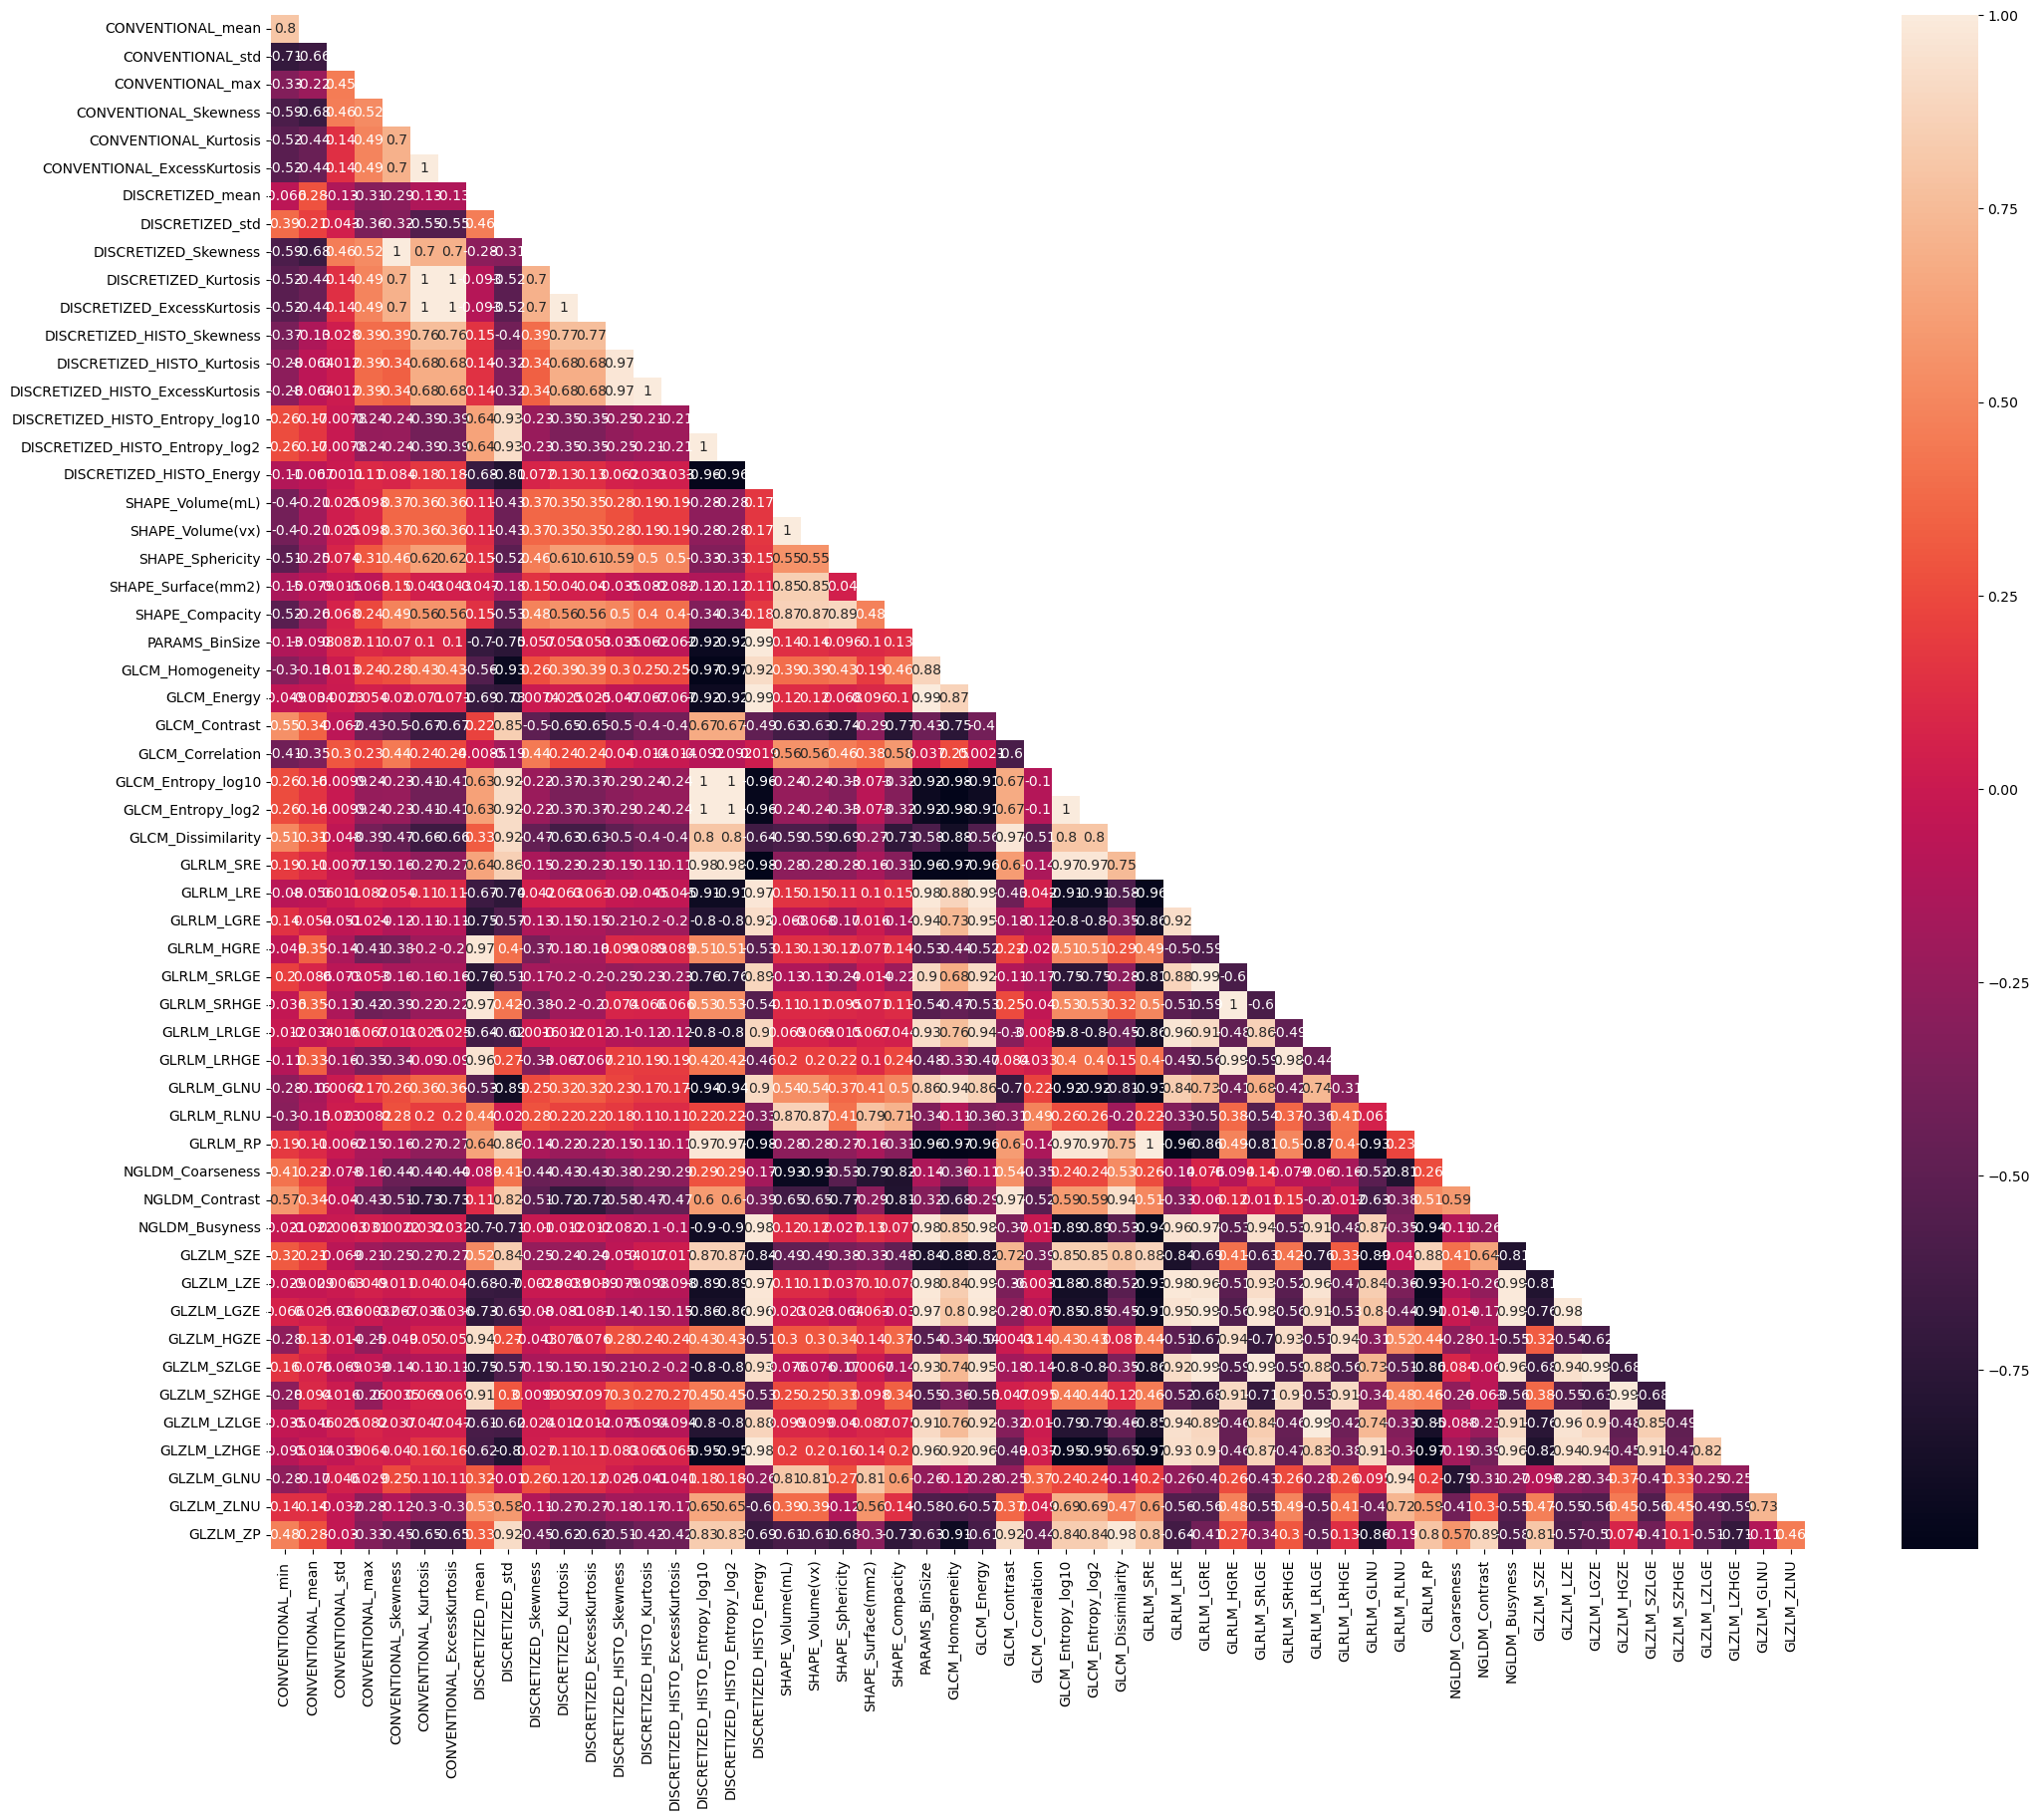

In [131]:
feat = X2

feat_corr_ = copy.deepcopy(feat)
feat_corr = feat_corr_.corr()


np.ones_like(feat_corr, dtype=np.bool)
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(25, 20))

# mask
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

# adjust mask and df
mask2 = mask2[1:, :-1]
corr2 = feat_corr.iloc[1:,:-1].copy()



# plot heatmap
sb.heatmap(corr2, mask=mask2, annot=True, square=True)

Through the heat map, we verify that there are many redundant values, and therefore, one of the 2 features them can be removed.
For correlation matrix, we defined a threshold of 0.9

## Heap Map with Redundant Features 

C:\Users\artur\AppData\Local\Temp\ipykernel_26332\4273311315.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(feat_corr, dtype=np.bool)
C:\Users\artur\AppData\Local\Temp\ipykernel_26332\4273311315.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))
C:\Users\artur\AppData\Local\

<AxesSubplot:>

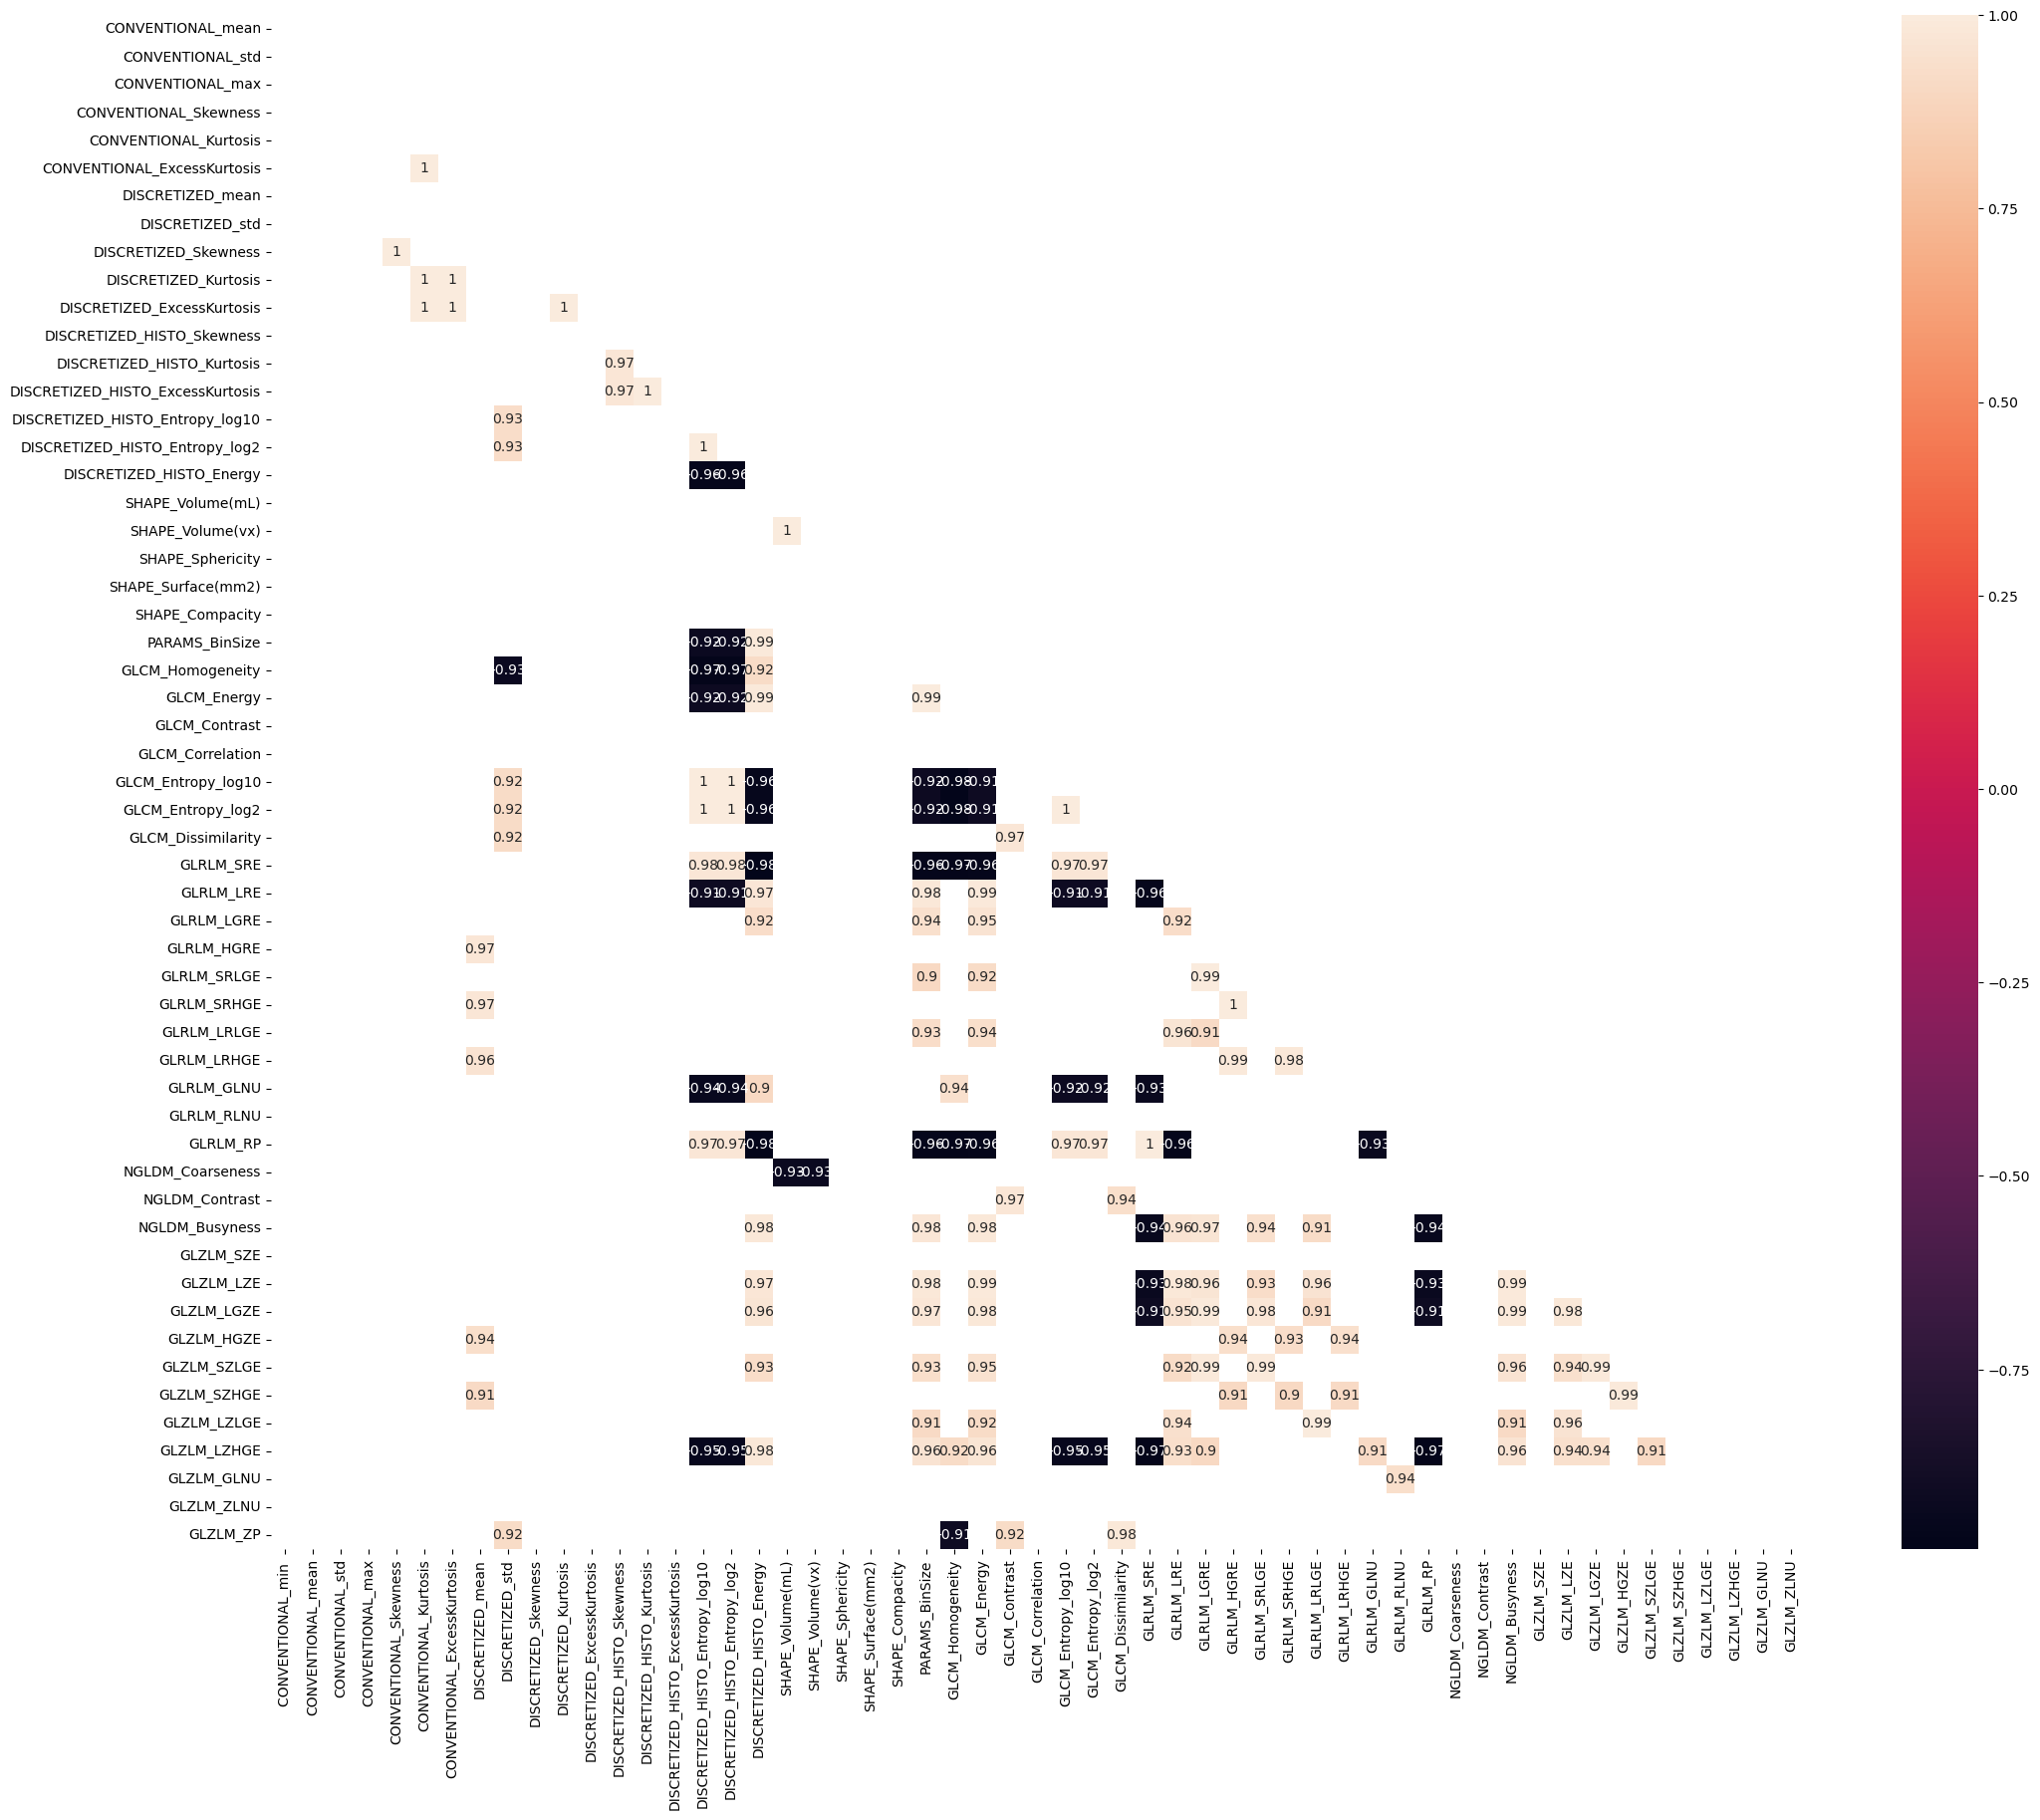

In [132]:

np.ones_like(feat_corr, dtype=np.bool)
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(25, 20))

# mask
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

# adjust mask and df
mask2 = mask2[1:, :-1]
corr2 = feat_corr.iloc[1:,:-1].copy()



# plot heatmap
sb.heatmap(corr2[(corr2 < -0.9) | (corr2 > 0.9)], mask=mask2, annot=True, square=True)


We also created a function that would allow us to create a new data frame, without one of the features that has a redundant value. Per example, the features GLZLM_SZE and GLRLM_SRE_ have a correlation of 0.94 and thus greater than 0.9, the function will then exclude one of them from the data frame

In [133]:
# The correlationM function was defined above.

corr_features = CorrelationM(X2, 0.9)

X2_uncorr = X2.drop(labels=corr_features,axis=1)
print(X1_uncorr)



     CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  CONVENTIONAL_max  \
0           143.976944         193.036763         18.728535        268.521362   
1           146.203033         193.219434         18.894705        264.507874   
2           119.456741         180.084749         25.137809        268.183777   
3           140.723282         191.422071         19.740543        258.418243   
4           154.285492         195.282236         18.942624        269.194366   
..                 ...                ...               ...               ...   
395         108.625511         174.769245         24.506665        272.439636   
396         113.150711         173.176363         23.910760        288.517029   
397         106.420631         170.458540         24.862542        276.337463   
398         112.068413         175.341361         22.655073        282.883026   
399         113.021751         176.801602         23.754028        280.110016   

     CONVENTIONAL_Skewness 

Feature selection is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.

For this step, we used Pearson Correlation and removed correlated features in the 3 files and created a new data frame 

In [134]:
# X2 - corresponds to the clean data with all the features
# X2_uncorr - corresponds to the new matrix without the correlated features - created to improve results


## Train_Test_Split Function
Now, we are going to use Sklearn train_test_split function that helps us to create our training data and teste. 

The fuctiong of sklearn.model_selection package in python splits arrays or matrices into random subsets for train and test, respectively.

In [135]:

X_train, X_test, y_train, y_test = train_test_split( X2_uncorr, y2, test_size=0.2, random_state=0,shuffle=True)

print(X_train.shape)



(320, 18)


## Binary Classification - Case 2/3 - 3 Methods

### Support Vector Machines
Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection.
SVM is a distance based classifer so data normalization should follow.



In [136]:
# Normalize the data using StandardScaler
scaler = StandardScaler()

# Its important to normalize both train and test data set
X_tr=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


Let's check out the parameters that can maximize this method:

In [137]:

parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.2],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy']


GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

So, we are going to apply the training set in this function, in this loop:

In [138]:
for value in scores:
    
    print("# Tuning hyper-parameters for %s" %value)
    print()
    
    classification = GridSearchCV(SVC(), parameters, scoring='%s' %value, cv=5)
    classification.fit(X_tr, y_train)

    print("Best parameters set found on development set:")
    print()
    print(classification.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    means = classification.cv_results_['mean_test_score']
    stds = classification.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, classification.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

Grid scores on development set:

0.781 (+/-0.074) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.803 (+/-0.042) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.803 (+/-0.070) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.831 (+/-0.080) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.794 (+/-0.121) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.831 (+/-0.091) for {'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
0.794 (+/-0.121) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.831 (+/-0.091) for {'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}
0.766 (+/-0.052) for {'C': 1, 'kernel': 'linear'}
0.791 (+/-0.094) for {'C': 10, 'kernel': 'linear'}
0.800 (+/-0.091) for {'C': 100, 'kernel': 'linear'}
0.787 (+/-0.116) for {'C': 1000, 'kernel': 'linear'}


Aplication of SVM Model, now that we now the indicated parameters.
Use of Stratified K fold cross-validation object - returns stratified folds that are made by preserving the percentage of samples for each class.

In [139]:
SVM_ef=SVC(C=10,kernel='rbf', max_iter=5000, tol=1e-03, verbose=0,gamma=0.2)
   
scores=[];    

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_train, y_train)

for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain = scaler.fit_transform(X_train.iloc[train])
    Xtest = scaler.transform(X_train.iloc[test])    

    # Train and apply the algorithm to one 
    # of the datasets (test/training) used

    SVM_ef.fit(Xtrain, y_train.iloc[train])
    score = SVM_ef.score(Xtest, y_train.iloc[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [139   0 149], Acc: 0.812
Fold: 2, Class dist.: [139   0 149], Acc: 0.781
Fold: 3, Class dist.: [139   0 149], Acc: 0.875
Fold: 4, Class dist.: [139   0 149], Acc: 0.875
Fold: 5, Class dist.: [139   0 149], Acc: 0.844
Fold: 6, Class dist.: [139   0 149], Acc: 0.812
Fold: 7, Class dist.: [138   0 150], Acc: 0.781
Fold: 8, Class dist.: [138   0 150], Acc: 0.906
Fold: 9, Class dist.: [138   0 150], Acc: 0.875
Fold: 10, Class dist.: [138   0 150], Acc: 0.812

CV accuracy: 0.838 +/- 0.041


Without StratifiedKFold, we are going to apply in all the training data set, at the same time

In [140]:
# Normalization
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

# Applying to training data
SVM_ef.fit(Xtr, y_train)
y_pred = SVM_ef.predict(Xtest)

print(classification_report(y_test,y_pred))

# we realize that the accuracy value associated with this analysis varies,
# so you should opt for cross validation

# Alternatively, the confusion matrix can be analyzed:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           2       0.75      0.79      0.77        34

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



The confusion matrix:

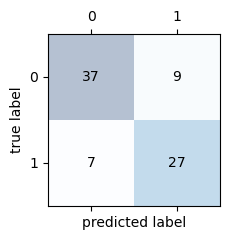

In [141]:

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

### Random Forests

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training phase and outputting the class that is the mode of the classes or the mean prediction of the individual trees.
The main idea behind the Random Forest is to build multiple decision trees on random subsets of the data and then combine their predictions to obtain a final prediction that is more accurate than the individual predictions of each tree.

We start by doing a standarization of the feature data for the training and testing set.
A set of hyperparameters are then defined as well as the score that will evaluate them and determinate, by a grid search, which is the best ensamble of hyperparameters to train this model. 

In [142]:
# Standarization
X_tr = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

# Hyperparameters and score
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90],    
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 3]
}
scores = ['accuracy']

# Grid search
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_tr, y_train)



c:\Users\artur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='accuracy')

Here we can access which set of hyperparameters graded with the best score, and analyse all the grid scores.

In [143]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print()
print("Best parameters: ")
print(best_params)
print()
print("Best score: ")
print(best_score)

# Obtainment of the mean and standard deviation of all scores calculated in the grid search
mean_score = grid_search.cv_results_['mean_test_score']
std_score = grid_search.cv_results_['std_test_score']

# Print of all grid scores with their error associated
print()
print("Grid scores on development set:")
for mean, std, params in zip(mean_score, std_score, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))





Best parameters: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}

Best score: 
0.809375

Grid scores on development set:
0.762 (+/-0.142) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
0.784 (+/-0.098) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}
0.775 (+/-0.124) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}
0.778 (+/-0.109) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
0.769 (+/-0.114) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 90}
0.772 (+/-0.070) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
0.769 (+/-0.075) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 60}
0.797 (+/-0.095) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
0

Aplication of Random Forest Model, now that we now the indicated parameters.
Use of Stratified K fold cross-validation object - returns stratified folds that are made by preserving the percentage of samples for each class.

In [144]:
# Random Forest model with the best hyperparameters
random_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'], oob_score=True, n_jobs=-1) 

# Stratified K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_tr, y_train)
scores=[]; 
X_tr_df = pd.DataFrame(X_tr)

for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain=scaler.fit_transform(X_tr_df.iloc[train])
    Xtest=scaler.transform(X_tr_df.iloc[test])    

    # Train and apply the algorithm to one
    # of the datasets (test/training) used
    random_forest.fit(Xtrain, y_train.iloc[train])
    score = random_forest.score(Xtest, y_train.iloc[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [139   0 149], Acc: 0.812
Fold: 2, Class dist.: [139   0 149], Acc: 0.844
Fold: 3, Class dist.: [139   0 149], Acc: 0.812
Fold: 4, Class dist.: [139   0 149], Acc: 0.750
Fold: 5, Class dist.: [139   0 149], Acc: 0.875
Fold: 6, Class dist.: [139   0 149], Acc: 0.781
Fold: 7, Class dist.: [138   0 150], Acc: 0.812
Fold: 8, Class dist.: [138   0 150], Acc: 0.781
Fold: 9, Class dist.: [138   0 150], Acc: 0.875
Fold: 10, Class dist.: [138   0 150], Acc: 0.750

CV accuracy: 0.809 +/- 0.043


After StratifiedKFold, we are going to apply in all the training data set, at the same time.
To finish, it's displayed the classification report of the predictor model and the related confusion matrix.  

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        46
           2       0.85      0.68      0.75        34

    accuracy                           0.81        80
   macro avg       0.82      0.79      0.80        80
weighted avg       0.82      0.81      0.81        80



Text(0.5, 1.0, 'Confusion Matrix')

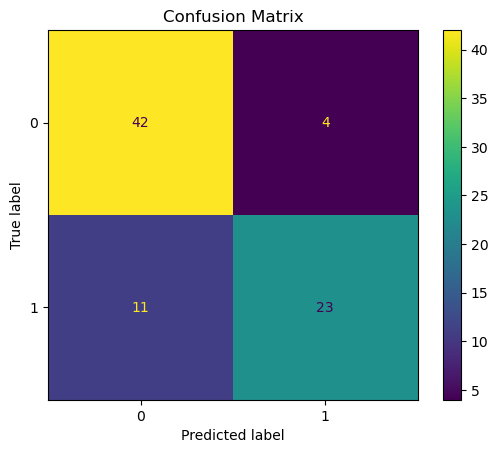

In [145]:
# Random Forest model applicated to the test set
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

random_forest.fit(Xtr, y_train)
y_pred = random_forest.predict(Xtest)

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

print("Classification Report:")
print(classification_report(y_test,y_pred))
disp.plot() 
disp.ax_.set_title("Confusion Matrix")


### Neural Networks

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [146]:
# As we did for the remaining methods, let's start by normalizing the data

scaler = StandardScaler()
X_tr_NN = scaler.fit_transform(X_train)
X_test_NN = scaler.transform(X_test)   


c:\Users\artur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MLP is then a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [147]:
# And then, apply the MLP Classifier

NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,32), random_state=1)

# datasets (test/training) used
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_train, y_train)
scores = []
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
all_conf_matrix = []



Obtaining the results for MLP classifier:

In [148]:
for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain = scaler.fit_transform(X_train.iloc[train])
    Xtest = scaler.transform(X_train.iloc[test])    

    # Train and apply the algorithm to one 
    # of the datasets (test/training) used

    NN.fit(Xtrain, y_train.iloc[train])
    y_pred = NN.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred) 
    all_conf_matrix.append(conf_mat)
    score = NN.score(Xtest, y_train.iloc[test])
    scores.append(score)
    
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train].values.ravel()), score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 1, Class dist.: [139   0 149], Acc: 0.750


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 2, Class dist.: [139   0 149], Acc: 0.812


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 3, Class dist.: [139   0 149], Acc: 0.750


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 4, Class dist.: [139   0 149], Acc: 0.844


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 5, Class dist.: [139   0 149], Acc: 0.812


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 6, Class dist.: [139   0 149], Acc: 0.812


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 7, Class dist.: [138   0 150], Acc: 0.812


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 8, Class dist.: [138   0 150], Acc: 0.906


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 9, Class dist.: [138   0 150], Acc: 0.844
Fold: 10, Class dist.: [138   0 150], Acc: 0.812

CV accuracy: 0.816 +/- 0.043


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We end by applying the model to the test data and displaying the classification report and confusion matrix.

c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        46
           2       0.78      0.74      0.76        34

    accuracy                           0.80        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80



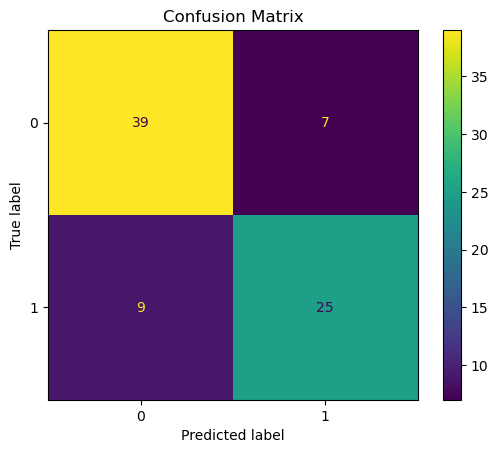

In [149]:
# Normalization
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

# Applying to training data
NN.fit(Xtr, y_train)
y_pred = NN.predict(Xtest)

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot() 
disp.ax_.set_title("Confusion Matrix")

print(classification_report(y_test,y_pred))

## Perfomance Comparasion of Binary Classifiers 
Starting with accuracy

In [150]:
scoring = 'accuracy'

Classifiers = []

Classifiers.append(('SVM', SVC(C=1,kernel='rbf', max_iter=5000, tol=1e-03, verbose=0,gamma=0.2)))
Classifiers.append(('rf', RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1 )))
Classifiers.append(('NN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,32), random_state=1)))


results = []
names = []

X1_uncorr_norm=scaler.fit_transform(X1_uncorr)

for name, model in Classifiers:

    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    print(model)
    cv_results = cross_val_score(model, X1_uncorr_norm, y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC(C=1, gamma=0.2, max_iter=5000, verbose=0)
SVM: 0.937500 (0.037500)
RandomForestClassifier(n_jobs=-1, oob_score=True)
rf: 0.932500 (0.031721)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64, 32), random_state=1)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multi

NN: 0.925000 (0.046098)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Now we are going to compare each models accuracy through boxplots:

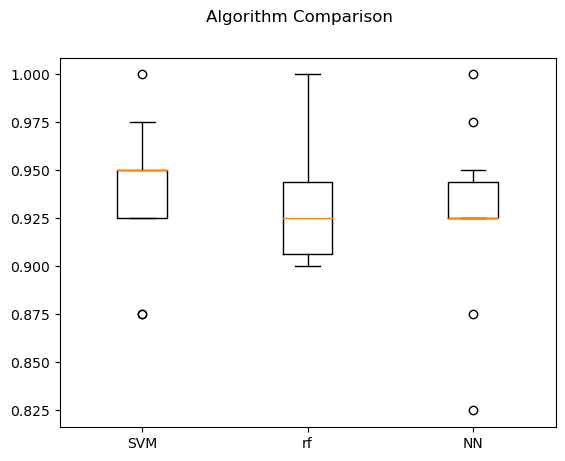

[array([0.875, 0.925, 0.95 , 0.95 , 0.975, 0.925, 0.95 , 0.95 , 0.875,
       1.   ]), array([0.925, 0.9  , 0.9  , 0.95 , 0.9  , 0.925, 1.   , 0.925, 0.925,
       0.975]), array([0.825, 0.925, 0.95 , 0.925, 0.925, 0.925, 1.   , 0.975, 0.875,
       0.925])]


In [151]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
print(results)

The median is the average value from a set of data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value, and half are less. For SVM we have an higher accuracy, with more precision and positive skew, that tell's us that this method its efficient 

For this case, the 3 method have shown similar range of values. However, SVM is considered again more efficient, for having positive skew and lower outliers. Second, we have RF with more symmetry than NN and lower outliers.


## Feature Ranking

Feature ranking allows us to identify which features are most important in predicting the target variable, and which ones can be ignored or removed from the model without significantly affecting its performance. This is useful in improving the model interpretability, and potentially reducing overfitting. It can also provide insights into the underlying relationships between features and the target variable, which can be useful for further analysis or domain knowledge.





We implemented this to our Neural Network model, to understand how can we approach future assignments.

Based on:
https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

The starting point was to see if our model suffers from overfitting comparing the score of the training and testing data.

In [152]:
NN.fit(X_tr, y_train)

print()
print(f'Model score on training data: {NN.score(X_tr, y_train)}')
print(f'Model score on test data: {NN.score(Xtest, y_test)}')
print()

c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model score on training data: 0.96875
Model score on test data: 0.8



c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The following functions have the ultimate goal of ranknig all the features.

The first function, aims to score the model's accuracy after permuting a column of a feature. 
The second function, computes the score difference between the model's performance on the original and the permuted data for a given feature. 
The third function, calculates the mean and standard deviation for all features after repeated permutations. 
The forth and last function, plots the rank of importance of each feature based on its score difference

In [153]:
# 1st function
def score_aft_permutation(model, x, y, current_feature):
    x_permuted = x.copy()
    col_i = list(x.columns).index(current_feature)

    # Permute a column
    x_permuted.iloc[:, col_i] = np.random.permutation(x_permuted[current_feature].values)
    permuted_score = model.score(x_permuted, y)
    
    return permuted_score

# 2nd function
def feature_score(model, x, y, current_feature):
    base_score = model.score(x, y)
    permuted_score = score_aft_permutation(model, x, y, current_feature)
    feature_score = base_score - permuted_score

    return feature_score

# 3rd function
def permutation_score(model, x, y, n_rep):
    score = []

    for current_feature in x.columns:
        list_feature_score = []

        for n_loop in range(n_rep):
            list_feature_score.append(feature_score(model, x, y, current_feature))

        score.append(list_feature_score)
    
    return{'Score mean': np.mean(score, axis=1),
           'Score standard deviation': np.std(score, axis=1),
           'Score': score}

# 4th function
def plot_feature_ranking(permuted_score, feature):
    fig, ax = plt.subplots()
    ind = permuted_score['Score mean'].argsort()

    plt.barh(range(len(ind)), permuted_score['Score mean'][ind], xerr=permuted_score['Score standard deviation'][ind])

    ax.set_yticks(range(len(ind)))
    _ = ax.set_yticklabels(feature[ind])



To finish, here it is the ranking of all each feature importance.

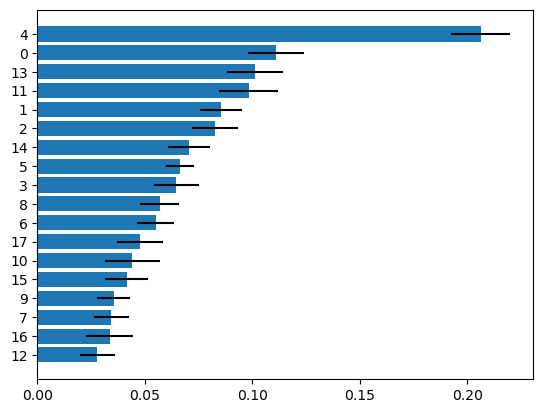

In [154]:
# Conversion of variables from numpy to Pandas
X_tr_df = pd.DataFrame(X_tr)
y_train_df = pd.DataFrame(y_train)

# Each feature is represented by its column number
permuted_score = permutation_score(NN, X_tr_df, y_train_df, n_rep=15)
plot_feature_ranking(permuted_score, X_tr_df.columns)

# The 4th feature ranks 1st 

# File 3 (WorkDAMCI.xlsx): 200 Mild Cognitive Impairment (MCI) vs 200 Alzheimer cases

The procedure used and the respective steps will be the same as those mentioned above. The features related to patient identification (not relevant for the algorithm) were previously removed.




In [155]:

df3.drop(['DISCRETIZED_min ', 'DISCRETIZED_max'],axis=1,inplace=True)

X3 = df3.iloc[:,3:]
y3 = df3.iloc[:,0] #Label


It is important to check if there are NaN values:

In [156]:
print(df3.isnull().values.any())

# Check if there are any null values.
# False = Does not exist NaN Values, True = Does exist

print(df3.describe())

False
          DAVSMCI        Age         Sex  CONVENTIONAL_min   \
count  400.000000  400.00000  400.000000         400.000000   
mean     1.500000   71.79500    0.572500         131.820667   
std      0.500626    5.73325    0.495335          14.249701   
min      1.000000   56.00000    0.000000          63.074924   
25%      1.000000   68.00000    0.000000         122.161440   
50%      1.500000   73.00000    1.000000         130.872536   
75%      2.000000   76.00000    1.000000         141.809673   
max      2.000000   89.00000    1.000000         166.692322   

       CONVENTIONAL_mean  CONVENTIONAL_std  CONVENTIONAL_max  \
count         400.000000        400.000000        400.000000   
mean          186.737203         21.193883        266.680524   
std             7.462764          2.345653          8.165912   
min           163.307302         14.672421        236.571289   
25%           182.637205         19.545408        261.912811   
50%           187.511825         21.088273

## Data Cleaning and Feature Selection

### By HeatMaps and Correlation Matrix

Removal of features using the correlation matrix. If two features are correlated with each other (value close to 1) then there is redundancy so we can remove one of them.






The correlation matrix is ​​calculated through .corr() and shows the Pearson correlation values, which indicates the linear relationship between two variables, which in this case is the linear relationship between two features of our DataFrame. These values ​​can vary from -1 to 1, and if the value is 1 these features increase and decrease together and equally with each other.

C:\Users\artur\AppData\Local\Temp\ipykernel_26332\639728100.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(feat_corr, dtype=np.bool)
C:\Users\artur\AppData\Local\Temp\ipykernel_26332\639728100.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))
C:\Users\artur\AppData\Local\Te

<AxesSubplot:>

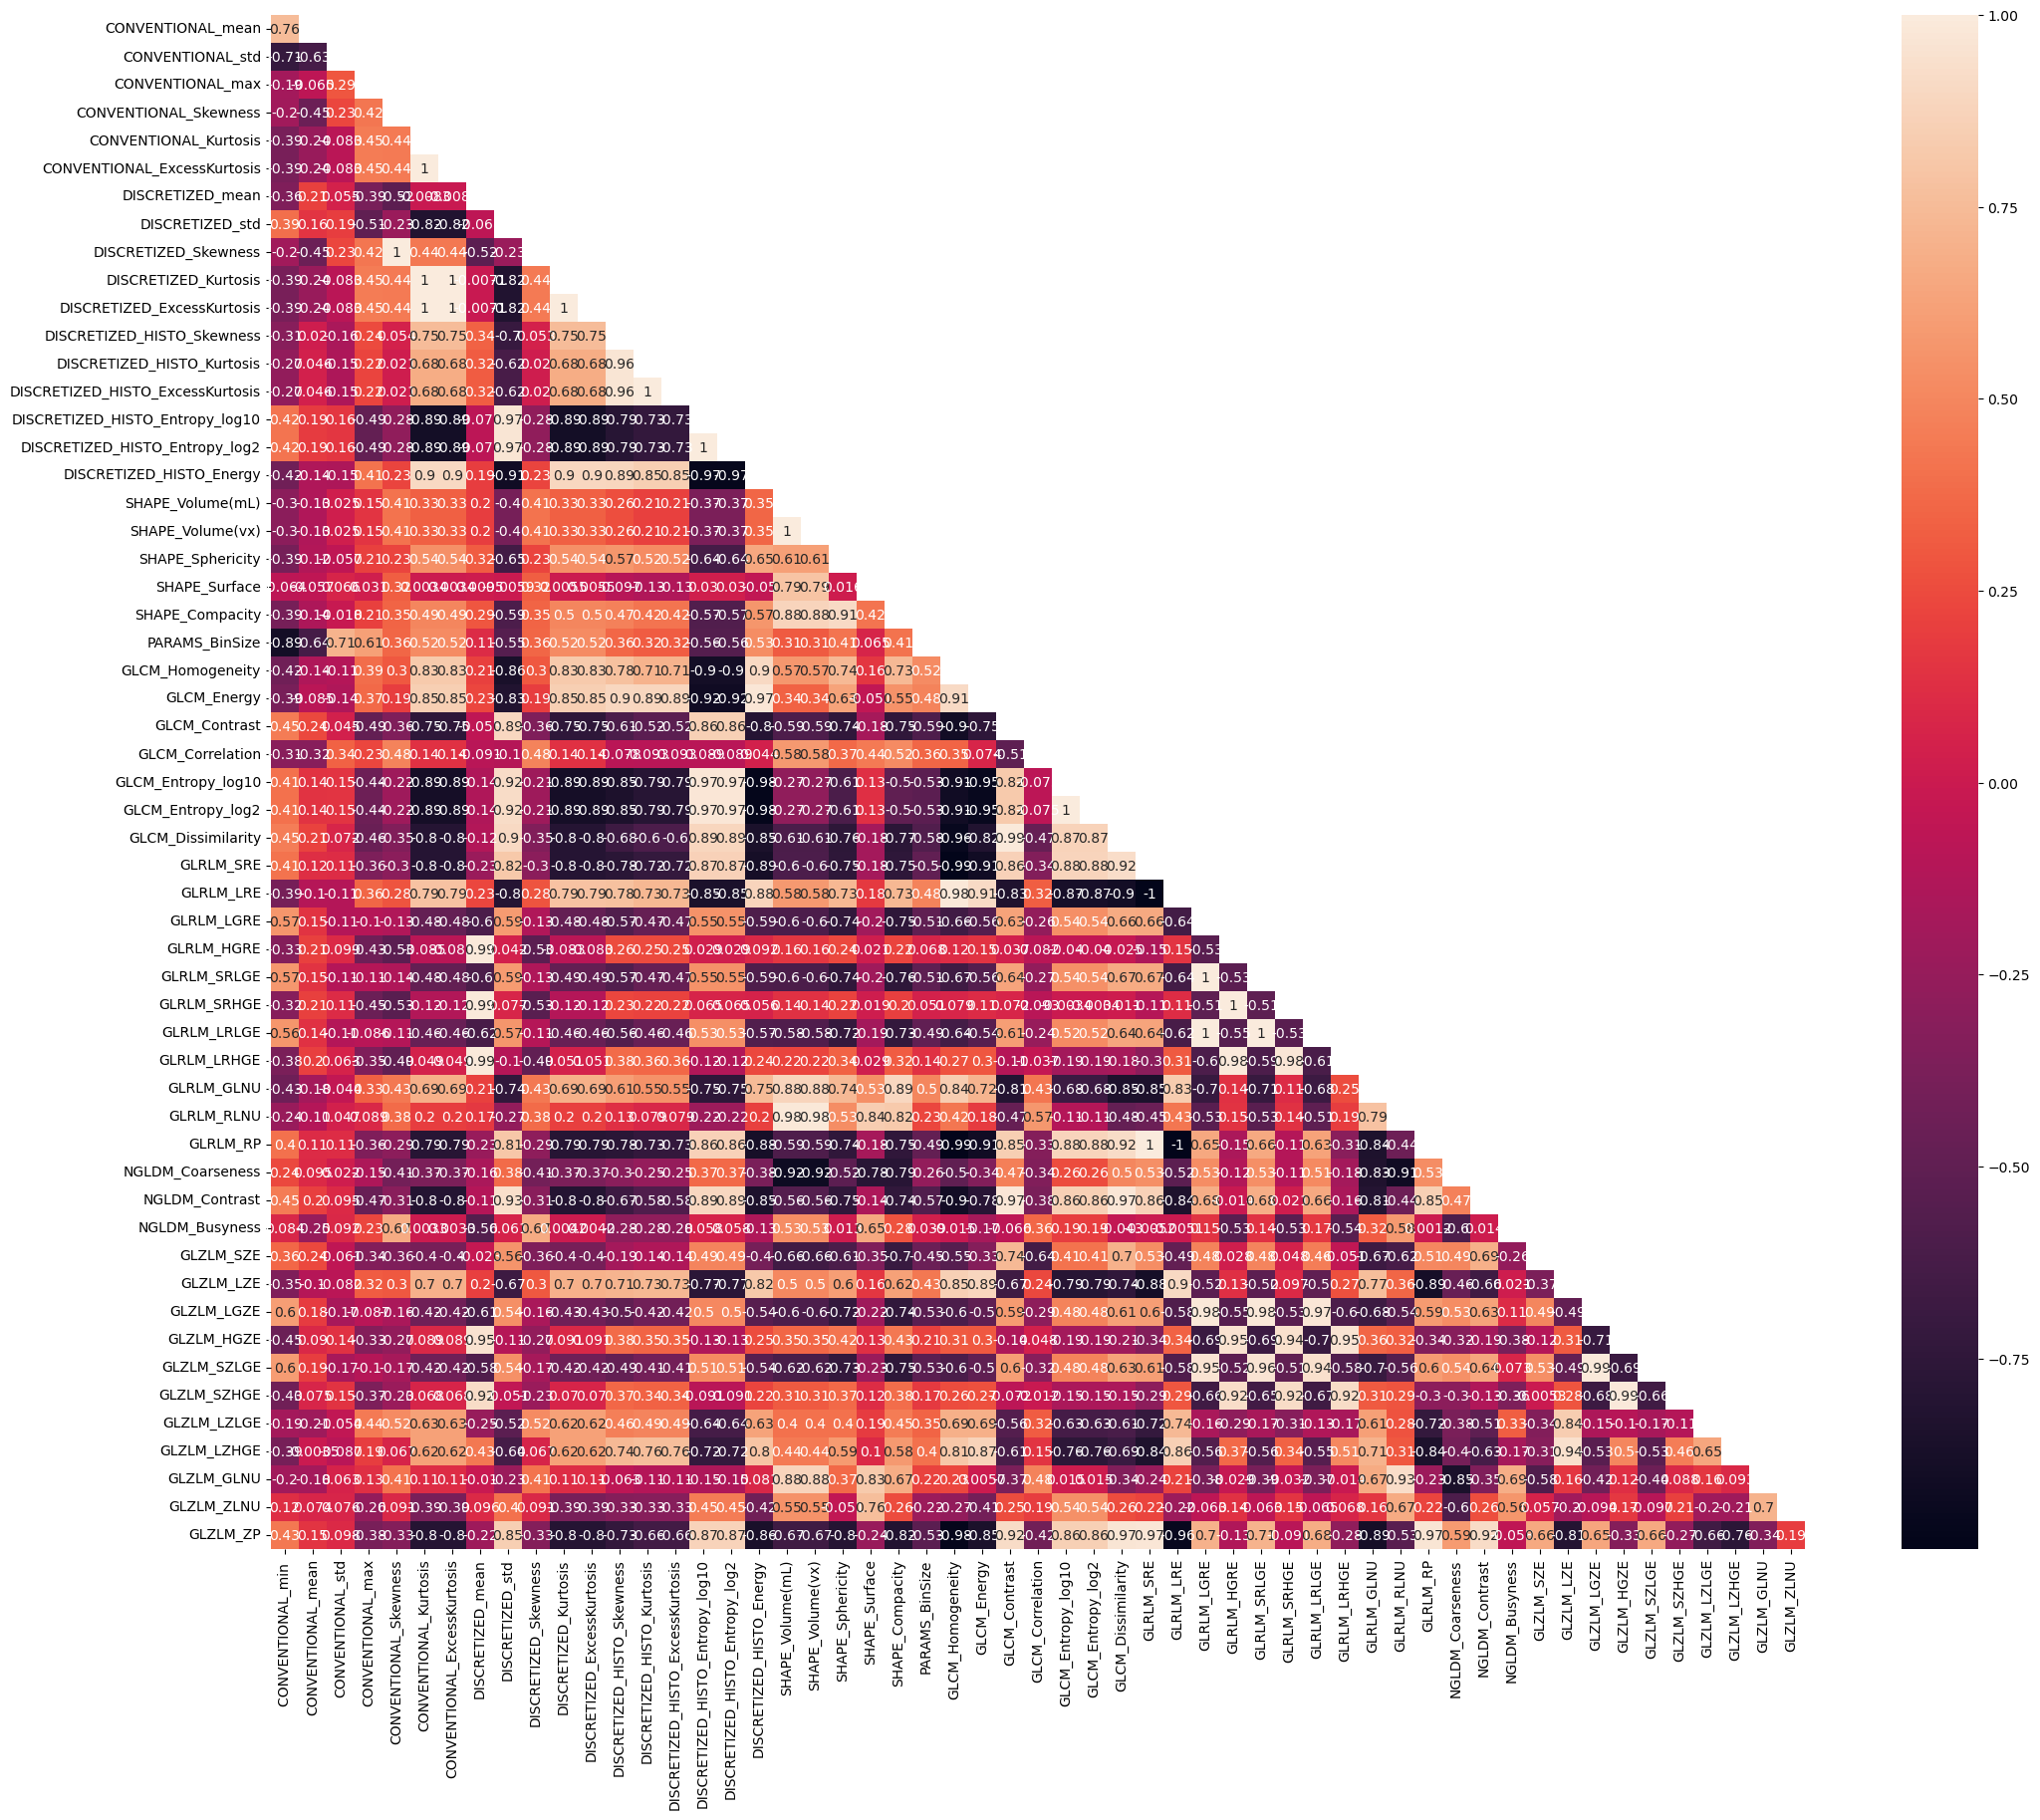

In [157]:
feat = X3

feat_corr_ = copy.deepcopy(feat)
feat_corr = feat_corr_.corr()


np.ones_like(feat_corr, dtype=np.bool)
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(25, 20))

# mask
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

# adjust mask and df
mask2 = mask2[1:, :-1]
corr2 = feat_corr.iloc[1:,:-1].copy()



# plot heatmap
sb.heatmap(corr2, mask=mask2, annot=True, square=True)

Through the heat map, we verify that there are many redundant values, and therefore, one of the 2 features them can be removed.
For correlation matrix, we defined a threshold of 0.9

## Heap Map with Redundant Features 

In [158]:

np.ones_like(feat_corr, dtype=np.bool)
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(25, 20))

# mask
mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))

# adjust mask and df
mask2 = mask2[1:, :-1]
corr2 = feat_corr.iloc[1:,:-1].copy()



# plot heatmap
sb.heatmap(corr2[(corr2 < -0.9) | (corr2 > 0.9)], mask=mask2, annot=True, square=True)

C:\Users\artur\AppData\Local\Temp\ipykernel_26332\4273311315.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(feat_corr, dtype=np.bool)
C:\Users\artur\AppData\Local\Temp\ipykernel_26332\4273311315.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.triu(np.ones_like(feat_corr, dtype=np.bool))
C:\Users\artur\AppData\Local\

<AxesSubplot:>


We also created a function that would allow us to create a new data frame, without one of the features that has a redundant value. Per example, the features GLZLM_SZE and GLRLM_SRE_ have a correlation of 0.94 and thus greater than 0.9, the function will then exclude one of them from the data frame

In [159]:
# The correlationM function was defined above.

corr_features = CorrelationM(X3, 0.9)

X3_uncorr = X3.drop(labels=corr_features,axis=1)
print(X3_uncorr)



     CONVENTIONAL_min   CONVENTIONAL_mean  CONVENTIONAL_std  CONVENTIONAL_max  \
0           143.976944         193.036763         18.728535        268.521362   
1           146.203033         193.219434         18.894705        264.507874   
2           119.456741         180.084749         25.137809        268.183777   
3           140.723282         191.422071         19.740543        258.418243   
4           154.285492         195.282236         18.942624        269.194366   
..                 ...                ...               ...               ...   
395         120.922150         177.155357         24.345190        272.825897   
396         120.922150         177.153519         24.347438        272.825897   
397         125.685104         190.829840         20.415510        269.328308   
398         132.197708         194.939306         20.881525        265.114258   
399         120.892219         185.728191         24.083631        272.182068   

     CONVENTIONAL_Skewness 

Feature selection is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.

For this step, we used Pearson Correlation and removed correlated features in the 3 files and created a new data frame 

In [160]:
# X3 - corresponds to the clean data with all the features
# X3_uncorr - corresponds to the new matrix without the correlated features - created to improve results


## Train_Test_Split Function
Now, we are going to use Sklearn train_test_split function that helps us to create our training data and teste. 

The fuctiong of sklearn.model_selection package in python splits arrays or matrices into random subsets for train and test, respectively.

In [161]:

X_train, X_test, y_train, y_test = train_test_split( X3_uncorr, y3, test_size=0.2, random_state=0,shuffle=True)

print(X_train.shape)

(320, 21)


## Binary Classification - Case 3/3 - 3 Methods

### Support Vector Machines
Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection.
SVM is a distance based classifer so data normalization should follow.



In [162]:
# Normalize the data using StandardScaler
scaler = StandardScaler()

# Its important to normalize both train and test data set
X_tr=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


Let's check out the parameters that can maximize this method:

In [163]:

parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.2],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy']


GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

So, we are going to apply the training set in this function, in this loop:

In [164]:
for value in scores:
    
    print("# Tuning hyper-parameters for %s" %value)
    print()
    
    classification = GridSearchCV(SVC(), parameters, scoring='%s' %value, cv=5)
    classification.fit(X_tr, y_train)

    print("Best parameters set found on development set:")
    print()
    print(classification.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    means = classification.cv_results_['mean_test_score']
    stds = classification.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, classification.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.703 (+/-0.120) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.684 (+/-0.072) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.738 (+/-0.078) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.688 (+/-0.071) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.719 (+/-0.086) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.688 (+/-0.071) for {'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
0.719 (+/-0.086) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.688 (+/-0.071) for {'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}
0.628 (+/-0.080) for {'C': 1, 'kernel': 'linear'}
0.644 (+/-0.087) for {'C': 10, 'kernel': 'linear'}
0.641 (+/-0.105) for {'C': 100, 'kernel': 'linear'}
0.641 (+/-0.105) for {'C': 1000, 'kernel': 'linear'}


Aplication of SVM Model, now that we now the indicated parameters.
Use of Stratified K fold cross-validation object - returns stratified folds that are made by preserving the percentage of samples for each class.

In [165]:
SVM_ef=SVC(C=10,kernel='rbf', max_iter=5000, tol=1e-03, verbose=0,gamma=0.1)
   
scores=[];    

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_train, y_train)

for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain = scaler.fit_transform(X_train.iloc[train])
    Xtest = scaler.transform(X_train.iloc[test])    

    # Train and apply the algorithm to one 
    # of the datasets (test/training) used

    SVM_ef.fit(Xtrain, y_train.iloc[train])
    score = SVM_ef.score(Xtest, y_train.iloc[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [  0 139 149], Acc: 0.688
Fold: 2, Class dist.: [  0 139 149], Acc: 0.594
Fold: 3, Class dist.: [  0 139 149], Acc: 0.781
Fold: 4, Class dist.: [  0 139 149], Acc: 0.781
Fold: 5, Class dist.: [  0 139 149], Acc: 0.844
Fold: 6, Class dist.: [  0 139 149], Acc: 0.719
Fold: 7, Class dist.: [  0 138 150], Acc: 0.656
Fold: 8, Class dist.: [  0 138 150], Acc: 0.781
Fold: 9, Class dist.: [  0 138 150], Acc: 0.688
Fold: 10, Class dist.: [  0 138 150], Acc: 0.844

CV accuracy: 0.738 +/- 0.078


Without StratifiedKFold, we are going to apply in all the training data set, at the same time

In [166]:
# Normalization
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

# Applying to training data
SVM_ef.fit(Xtr, y_train)
y_pred = SVM_ef.predict(Xtest)

print(classification_report(y_test,y_pred))

# we realize that the accuracy value associated with this analysis varies,
# so you should opt for cross validation

# Alternatively, the confusion matrix can be analyzed:

              precision    recall  f1-score   support

           1       0.84      0.83      0.84        46
           2       0.77      0.79      0.78        34

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



The confusion matrix:

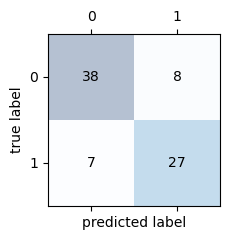

In [167]:

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

### Random Forests

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training phase and outputting the class that is the mode of the classes or the mean prediction of the individual trees.
The main idea behind the Random Forest is to build multiple decision trees on random subsets of the data and then combine their predictions to obtain a final prediction that is more accurate than the individual predictions of each tree.

We start by doing a standarization of the feature data for the training and testing set.
A set of hyperparameters are then defined as well as the score that will evaluate them and determinate, by a grid search, which is the best ensamble of hyperparameters to train this model. 

In [168]:
# Standarization 
X_tr = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

# Hyperparameters and score
param_grid = {
    'n_estimators': [60, 70, 80, 90, 100],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4]
}
scores = ['accuracy']

# Grid search
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_tr, y_train)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [60, 70, 80, 90, 100]},
             scoring='accuracy')

Here we can access which set of hyperparameters graded with the best score, and analyse all the grid scores.

In [169]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters: ")
print(best_params)
print()
print("Best score: ")
print(best_score)

# Obtainment of the mean and standard deviation of all scores calculated in the grid search
mean_score = grid_search.cv_results_['mean_test_score']
std_score = grid_search.cv_results_['std_test_score']

# Print of all grid scores with their error associated
print()
print("Grid scores on development set:")
for mean, std, params in zip(mean_score, std_score, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))


Best parameters: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}

Best score: 
0.671875

Grid scores on development set:
0.634 (+/-0.054) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}
0.644 (+/-0.050) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}
0.619 (+/-0.064) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
0.616 (+/-0.073) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 90}
0.606 (+/-0.041) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.619 (+/-0.051) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 60}
0.628 (+/-0.036) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
0.628 (+/-0.054) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 80}
0

Aplication of Random Forest Model, now that we now the indicated parameters.
Use of Stratified K fold cross-validation object - returns stratified folds that are made by preserving the percentage of samples for each class.

In [170]:
# Random Forest model with the best hyperparameters
random_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'], oob_score=True, n_jobs=-1) 

# Stratified K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_tr, y_train)
scores=[]; 
X_tr_df = pd.DataFrame(X_tr)

for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain=scaler.fit_transform(X_tr_df.iloc[train])
    Xtest=scaler.transform(X_tr_df.iloc[test])    

    # Train and apply the algorithm to one
    # of the datasets (test/training) used
    random_forest.fit(Xtrain, y_train.iloc[train])
    score = random_forest.score(Xtest, y_train.iloc[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))



Fold: 1, Class dist.: [  0 139 149], Acc: 0.500
Fold: 2, Class dist.: [  0 139 149], Acc: 0.688
Fold: 3, Class dist.: [  0 139 149], Acc: 0.656
Fold: 4, Class dist.: [  0 139 149], Acc: 0.781
Fold: 5, Class dist.: [  0 139 149], Acc: 0.688
Fold: 6, Class dist.: [  0 139 149], Acc: 0.719
Fold: 7, Class dist.: [  0 138 150], Acc: 0.656
Fold: 8, Class dist.: [  0 138 150], Acc: 0.719
Fold: 9, Class dist.: [  0 138 150], Acc: 0.656
Fold: 10, Class dist.: [  0 138 150], Acc: 0.625

CV accuracy: 0.669 +/- 0.070


After StratifiedKFold, we are going to apply in all the training data set, at the same time.
To finish, it's displayed the classification report of the predictor model and the related confusion matrix.  

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.78      0.80        46
           2       0.72      0.76      0.74        34

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



Text(0.5, 1.0, 'Confusion Matrix')

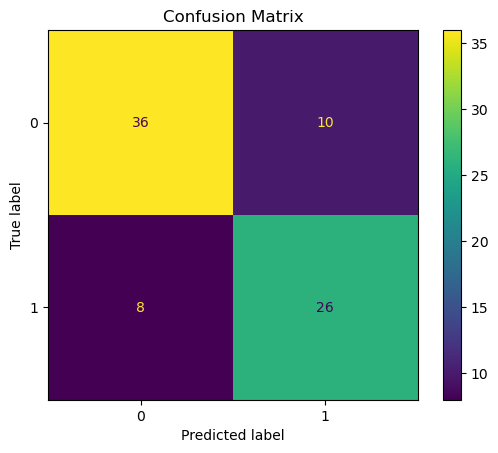

In [171]:
# Random Forest model applicated to the test set
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

random_forest.fit(Xtr, y_train)
y_pred = random_forest.predict(Xtest)

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

print("Classification Report:")
print(classification_report(y_test,y_pred))
disp.plot() 
disp.ax_.set_title("Confusion Matrix")

### Neural Networks

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [172]:
# As we did for the remaining methods, let's start by normalizing the data

scaler = StandardScaler()
X_tr_NN = scaler.fit_transform(X_train)
X_test_NN = scaler.transform(X_test)   


c:\Users\artur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MLP is then a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [173]:
# And then, apply the MLP Classifier

NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,32), random_state=1)

# datasets (test/training) used
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True).split(X_train, y_train)
scores = []
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
all_conf_matrix = []



Obtaining the results for MLP classifier:

In [174]:
for k, (train, test) in enumerate(kfold):

    # Normalization
    Xtrain = scaler.fit_transform(X_train.iloc[train])
    Xtest = scaler.transform(X_train.iloc[test])    

    # Train and apply the algorithm to one 
    # of the datasets (test/training) used

    NN.fit(Xtrain, y_train.iloc[train])
    y_pred = NN.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred) 
    all_conf_matrix.append(conf_mat)
    score = NN.score(Xtest, y_train.iloc[test])
    scores.append(score)
    
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train.iloc[train].values.ravel()), score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 1, Class dist.: [  0 139 149], Acc: 0.750


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 2, Class dist.: [  0 139 149], Acc: 0.594


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 3, Class dist.: [  0 139 149], Acc: 0.625


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 4, Class dist.: [  0 139 149], Acc: 0.750


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 5, Class dist.: [  0 139 149], Acc: 0.781


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 6, Class dist.: [  0 139 149], Acc: 0.656


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 7, Class dist.: [  0 138 150], Acc: 0.719


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 8, Class dist.: [  0 138 150], Acc: 0.656


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold: 9, Class dist.: [  0 138 150], Acc: 0.562
Fold: 10, Class dist.: [  0 138 150], Acc: 0.844

CV accuracy: 0.694 +/- 0.085


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We end by applying the model to the test data and displaying the classification report and confusion matrix.

In [175]:
# Normalization
Xtr = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

# Applying to training data
NN.fit(Xtr, y_train)
y_pred = NN.predict(Xtest)

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot() 
disp.ax_.set_title("Confusion Matrix")

print(classification_report(y_test,y_pred))

c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.86      0.78      0.82        46
           2       0.74      0.82      0.78        34

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80



## Perfomance Comparasion of Binary Classifiers 
Starting with accuracy

In [176]:
scoring = 'accuracy'

Classifiers = []

Classifiers.append(('SVM', SVC(C=1,kernel='rbf', max_iter=5000, tol=1e-03, verbose=0,gamma=0.2)))
Classifiers.append(('rf', RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1 )))
Classifiers.append(('NN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(64,32), random_state=1)))


results = []
names = []

X1_uncorr_norm=scaler.fit_transform(X1_uncorr)

for name, model in Classifiers:

    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    print(model)
    cv_results = cross_val_score(model, X1_uncorr_norm, y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC(C=1, gamma=0.2, max_iter=5000, verbose=0)
SVM: 0.937500 (0.037500)
RandomForestClassifier(n_jobs=-1, oob_score=True)
rf: 0.927500 (0.041003)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64, 32), random_state=1)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multi

NN: 0.925000 (0.046098)


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Now we are going to compare each models accuracy through boxplots:

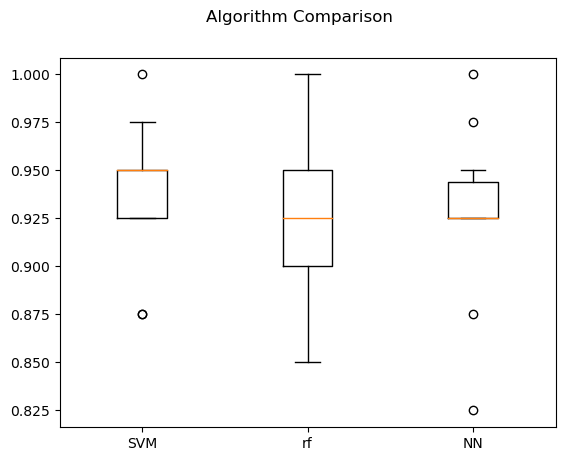

[array([0.875, 0.925, 0.95 , 0.95 , 0.975, 0.925, 0.95 , 0.95 , 0.875,
       1.   ]), array([0.9  , 0.85 , 0.95 , 0.95 , 0.9  , 0.925, 1.   , 0.925, 0.9  ,
       0.975]), array([0.825, 0.925, 0.95 , 0.925, 0.925, 0.925, 1.   , 0.975, 0.875,
       0.925])]


In [177]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
print(results)

The median is the average value from a set of data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value, and half are less. For SVM we have an higher accuracy, with more precision and positive skew, that tell's us that this method its efficient 
Similar to SVM, NN method presents a smaller range of values ​​being more specific than RF. However, the values of accuracy are lower and we have more outliers.

So, for 200 Mild Cognitive Impairment (MCI) vs 200 Alzheimer cases, we considerer that the SVM is, again, the indicated classifier.

## Feature Ranking

Feature ranking allows us to identify which features are most important in predicting the target variable, and which ones can be ignored or removed from the model without significantly affecting its performance. This is useful in improving the model interpretability, and potentially reducing overfitting. It can also provide insights into the underlying relationships between features and the target variable, which can be useful for further analysis or domain knowledge.





We implemented this to our Neural Network model, to understand how can we approach future assignments.

Based on:
https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

The starting point was to see if our model suffers from overfitting comparing the score of the training and testing data.

In [178]:
NN.fit(X_tr, y_train)

print()
print(f'Model score on training data: {NN.score(X_tr, y_train)}')
print(f'Model score on test data: {NN.score(Xtest, y_test)}')
print()


c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model score on training data: 0.975
Model score on test data: 0.8



c:\Users\artur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The following functions have the ultimate goal of ranknig all the features.

The first function, aims to score the model's accuracy after permuting a column of a feature. 
The second function, computes the score difference between the model's performance on the original and the permuted data for a given feature. 
The third function, calculates the mean and standard deviation for all features after repeated permutations. 
The forth and last function, plots the rank of importance of each feature based on its score difference

In [179]:
# 1st function
def score_aft_permutation(model, x, y, current_feature):
    x_permuted = x.copy()
    col_i = list(x.columns).index(current_feature)

    # Permute a column
    x_permuted.iloc[:, col_i] = np.random.permutation(x_permuted[current_feature].values)
    permuted_score = model.score(x_permuted, y)
    
    return permuted_score

# 2nd function
def feature_score(model, x, y, current_feature):
    base_score = model.score(x, y)
    permuted_score = score_aft_permutation(model, x, y, current_feature)
    feature_score = base_score - permuted_score

    return feature_score

# 3rd function
def permutation_score(model, x, y, n_rep):
    score = []

    for current_feature in x.columns:
        list_feature_score = []

        for n_loop in range(n_rep):
            list_feature_score.append(feature_score(model, x, y, current_feature))

        score.append(list_feature_score)
    
    return{'Score mean': np.mean(score, axis=1),
           'Score standard deviation': np.std(score, axis=1),
           'Score': score}

# 4th function
def plot_feature_ranking(permuted_score, feature):
    fig, ax = plt.subplots()
    ind = permuted_score['Score mean'].argsort()

    plt.barh(range(len(ind)), permuted_score['Score mean'][ind], xerr=permuted_score['Score standard deviation'][ind])

    ax.set_yticks(range(len(ind)))
    _ = ax.set_yticklabels(feature[ind])



To finish, here it is the ranking of all each feature importance.

In [180]:
# Conversion of variables from numpy to Pandas
X_tr_df = pd.DataFrame(X_tr)
y_train_df = pd.DataFrame(y_train)

# Each feature is represented by its column number
permuted_score = permutation_score(NN, X_tr_df, y_train_df, n_rep=15)
plot_feature_ranking(permuted_score, X_tr_df.columns)

# The 15th feature ranks 1st 

# Conclusion

For the 3 files, we conclude that the Support Vector Machines is the indicated classifier. This classifier presented values higher values of accuracy for the 3 files of the data set. SVM is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups. 

In supervised learning, input data is provided to the model along with the output. In unsupervised learning, only input data is provided to the model. The goal of supervised learning is to train the model so that it can predict the output when it is given new data.

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. This method  showed a high range of values ​​for all files which increases the variability and decreases the precision of the model.

NN model showed lower range of values. However, its has bigger outliers and lower values for accuracy, being the last indicated classifier, in the most of the 3 cases.